# Оптимизация производственных расходов металлургического комбината

[Описание проекта](#0)

[1 Загрузка, исследование и обработка данных](#1) 
- [1.1 Просмотр датафрейма с данными об электродах](#1.1)
-- [1.1.1 EDA и предобработка данных с электродами](#1.1.1)

- [1.2 Просмотр датафрейма с данными о подаче сыпучих материалов (объём)](#1.2)
-- [1.2.1 EDA и предобработка данных о подаче сыпучих материалов (объём)](#1.2.1)

- [1.3 Просмотр датафрейма с данными о подаче сыпучих материалов (время)](#1.3)
-- [1.3.1 EDA и предобработка данных о подаче сыпучих материалов (время)](#1.3.1)

- [1.4 Просмотр датафрейма с данными о продувке сплава газом](#1.4)
-- [1.4.1 EDA и предобработка данных о продувке сплава газом](#1.4.1)

- [1.5 Просмотр датафрейма с данными об измерении температуры](#1.5)
-- [1.5.1 EDA и предобработка данных об измерении температуры](#1.5.1)

- [1.6 Просмотр датафрейма с данными о проволочных материалах (объём)](#1.6)
-- [1.6.1 EDA и предобработка данных о проволочных материалах (объём)](#1.6.1)

- [1.7 Просмотр датафрейма с данными о проволочных материалах (время)](#1.7)
-- [1.7.1 EDA и предобработка данных о проволочных материалах (время)](#1.7.1)

[2 Анализ объединенных данных](#2)

[3 Обучение моделей](#3)
- [3.1 Линейные модели](#3.1)
- [3.2 Случайный Лес](#3.2)
- [3.3 Градиентный Бустинг](#3.3)
- [3.4 CatBoost](#3.4)
- [3.5 Дерево решений](#3.5)

[4 Тестирование моделей](#4)

[5 Общий вывод](#5)

**Описание проекта**
<a name="0"></a>

Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Ваша задача — построить модель, которая будет её предсказывать. 
Заказчик хочет использовать разработанную модель для имитации технологического процесса. Ниже расскажем о деталях этого процесса. Их важно знать, прежде чем генерировать новые признаки.

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 
Из сплава выводится сера (этот процесс — десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).
Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.
Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).

**Описание данных**

Данные состоят из нескольких файлов, полученных из разных источников:

*	data_arc_new.csv — данные об электродах;

*	data_bulk_new.csv — данные о подаче сыпучих материалов (объём);

*	data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);

*	data_gas_new.csv — данные о продувке сплава газом;

*	data_temp_new.csv — результаты измерения температуры;

*	data_wire_new.csv — данные о проволочных материалах (объём);

*	data_wire_time_new.csv — данные о проволочных материалах (время).

Файл data_arc_new.csv

*	key — номер партии;

*	Начало нагрева дугой — время начала нагрева;

*	Конец нагрева дугой — время окончания нагрева;

*	Активная мощность — значение активной мощности;

*	Реактивная мощность — значение реактивной мощности.

Файл data_bulk_new.csv

*	key — номер партии;

*	Bulk 1 … Bulk 15 — объём подаваемого материала.

Файл data_bulk_time_new.csv

*	key — номер партии;

*	Bulk 1 … Bulk 15 — время подачи материала.

Файл data_gas_new.csv

*	key — номер партии;

*	Газ 1 — объём подаваемого газа.

Файл data_temp_new.csv

*	key — номер партии;

*	Время замера — время замера;

*	Температура — значение температуры.

Файл data_wire_new.csv

*	key — номер партии;

*	Wire 1 … Wire 15 — объём подаваемых проволочных материалов.

Файл data_wire_time_new.csv

*	key — номер партии;

*	Wire 1 … Wire 15 — время подачи проволочных материалов.

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

**План работы**

Шаг 1. Загрузка данных

Загрузим данные и выполним их первичный осмотр.

Шаг 2. Исследовательский анализ и предобработка данных

Выполним исследовательский анализ каждого датафрейма и при необходимости выполним предобработку. Сделаем выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

Шаг 3. Объединение данных

Объединим выбранные нами признаки в один датафрейм по ключу.

Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма

Выполним исследовательский анализ объединённого датафрейма, визуализируем распределения признаков и при необходимости выполним предобработку. Проведем корреляционный анализ. Можем использовать не только имеющиеся признаки, но и генерировать новые.

Шаг 5. Подготовка данных

Выполним подготовку данных для обучения модели. Разделим данные на две выборки, при масштабировании и кодировании учтем особенности данных и моделей.

Шаг 6. Обучение моделей машинного обучения

Обучим как минимум три модели. Хотя бы для одной из них подберем гиперпараметры.

Шаг 7. Выбор лучшей модели

Выберем лучшую модель и проверим её качество на тестовой выборке.

Шаг 8. Общий вывод и рекомендации заказчику

Сделаем общий вывод о проделанной работе: опишем основные этапы работы, полученные результаты и дадим рекомендации для бизнеса.


## Загрузка, исследование и обработка данных
<a name="1"></a>

In [1]:
# Импортируем необходимые модули
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [2]:
# Игнорируем все предупреждения
from warnings import simplefilter
pd.set_option('chained_assignment', None)
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Определим константы
RANDOM_STATE = 120424
TEST_SIZE=0.25

In [4]:
# Загрузим данные
files_list = ['data_arc_new', 'data_bulk_new', 'data_bulk_time_new', 
             'data_gas_new', 'data_temp_new', 'data_wire_new', 'data_wire_time_new']
files_dict =  dict.fromkeys(files_list)
for i in files_dict:
    path1 = '/datasets/' + i + '.csv'
    path2 = i + '.csv'

    if os.path.exists(path2):
        files_dict[i] = pd.read_csv(path2)
    elif os.path.exists(path1):
        files_dict[i] = pd.read_csv(path1)
    else:
        print('Данные не загружены!')

In [5]:
# Создадим функцию описания данных
def data_info(df):
    print('Размер датасета:')
    display(df.shape)
    print()
    print('Первые три значения датасета:')
    display(df.head(3))
    print()
    print('Последние три значения датасета:')
    display(df.head(3))
    print()
    print('Информация датасета:')
    df.info()
    print()
    print('Описание датасета:')
    display(df.describe())
    print()
    print(f'Количествово пропусков:{df.isna().sum()}') 
    print()
    display(f'Количествово дубликатов:{df.duplicated().sum()}')
    print()
    print('Уникальные значения датасета:')
    display(df.nunique())

In [6]:
# Создадим функцию плотности распределения мощности 1
def draw_hist(df):
    for i in df[['Активная мощность', 'Реактивная мощность']]:
        plt.figure(figsize=(15,4))
        sns.distplot(df[i], bins=100, color='green')
        plt.title(f'Распределение плотности данных в столбце "{i}"')
        plt.xlabel('Значение')
        plt.ylabel('Количество')
        plt.show();

In [7]:
# Создадим функцию отображения ящика с усами 1
def draw_box(df):
    for i in df[['Активная мощность', 'Реактивная мощность']]:
        plt.figure(figsize=(15,2))
        sns.boxplot(data=df[i], orient='h', color='red')
        plt.title(f'Диаграмма размаха столбца "{i}"')
        plt.xlabel('Значение')
        plt.show();

In [8]:
# Создадим функцию плотности распределения мощности 2
def draw_hist1(df):
    for i in df.drop('key',axis=1):
        plt.figure(figsize=(15,4))
        sns.distplot(df[i], bins=100, color='green')
        plt.title(f'Распределение плотности данных в столбце "{i}"')
        plt.xlabel('Значение')
        plt.ylabel('Количество')
        plt.show();

In [9]:
# Создадим функцию отображения ящика с усами 2
def draw_box1(df):
    for i in df.drop('key',axis=1):
        plt.figure(figsize=(15,2))
        sns.boxplot(data=df[i], orient='h', color='red')
        plt.title(f'Диаграмма размаха столбца "{i}"')
        plt.xlabel('Значение')
        plt.show();

In [10]:
# Создадим функцию отображения ящика с усами 3
def draw_box2(df):
    plt.figure(figsize=(15,5))
    sns.boxplot(data=df.drop('key',axis=1))
    plt.grid();

### Просмотр датафрейма с данными об электродах
<a name="1.1"></a>

In [11]:
# Создадим датафрейм и сохраним в него данные
data_arc_new = files_dict['data_arc_new']

In [12]:
# Посмотрим информацию о датафрейме
data_info(data_arc_new)

Размер датасета:


(14876, 5)


Первые три значения датасета:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460



Последние три значения датасета:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460



Информация датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB

Описание датасета:


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284



Количествово пропусков:key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64



'Количествово дубликатов:0'


Уникальные значения датасета:


key                      3214
Начало нагрева дугой    14876
Конец нагрева дугой     14876
Активная мощность       13846
Реактивная мощность     14707
dtype: int64

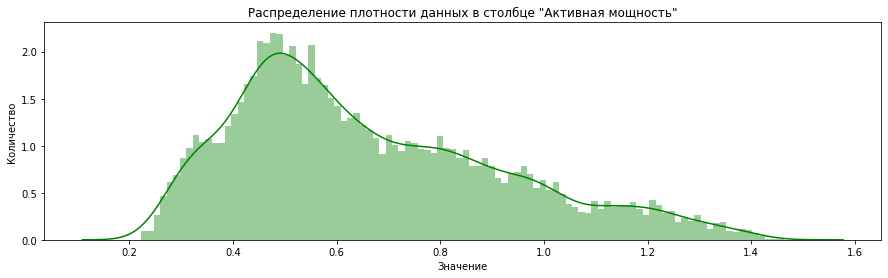

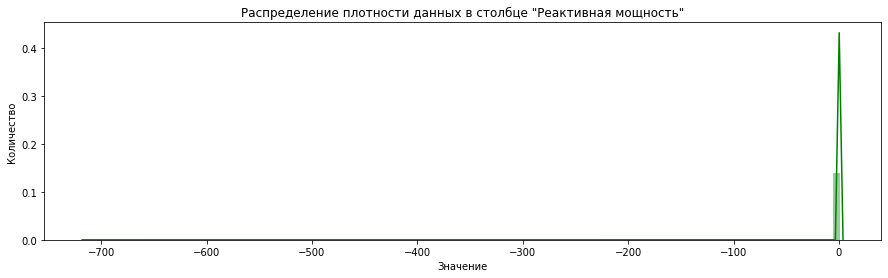

In [13]:
# Посмотрим на плотность распределения мощности датафрейма
draw_hist(data_arc_new)

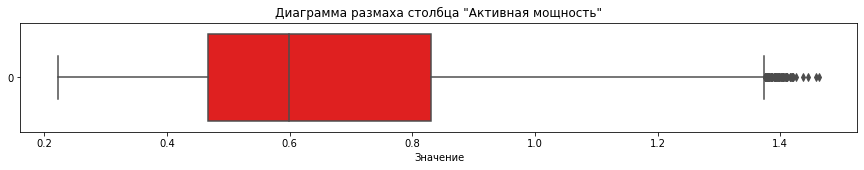

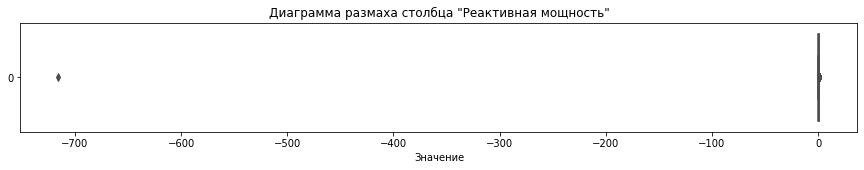

In [14]:
# Посмотрим отображение ящика с усами для датафрейма
draw_box(data_arc_new)

**Итог по п. 1.1:**

- были загружены данные. 
- выведена общая информация по датасету об электродах.
- всего даных 14876.
- пропуски и дубликаты отсутствуют.
- в данных содержится информация с 03 мая по 06 сентября 2019 года.
- присутствуют выбросы.

#### EDA и предобработка данных с электродами
<a name="1.1.1"></a>

In [15]:
# Приведем даты к нужному формату
data_arc_new["Начало нагрева дугой"] = pd.to_datetime(
    data_arc_new["Начало нагрева дугой"])
data_arc_new["Конец нагрева дугой"] = pd.to_datetime(
    data_arc_new["Конец нагрева дугой"])

In [16]:
# Посмотрим на выброс в данных
data_arc_new.loc[data_arc_new['Реактивная мощность']<0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


Физически мощность может иметь отрицательное значение, но такое значение в данных одно и для имеющихся данных уникально, а также имеет очень высокое значение по модулю, что свидетельствует о некорректности этого значения. Для коррекорректной замены рассчитаем корреляцию между активной и реактивной мощностью, исключив данное значение

In [17]:
data_arc_new.query('index != 9780')[['Активная мощность', 'Реактивная мощность']].corr()

,Активная мощность,Реактивная мощность
Активная мощность,1.000000,0.966373
Реактивная мощность,0.966373,1.000000


Между активной и реактивной мощностью высокая положительная корреляция

In [18]:
(data_arc_new.query('index != 9780')['Реактивная мощность'] / data_arc_new.
 query('index != 9780')['Активная мощность']).mean().round(2)

0.73

Реактивная мощность составляет в среднем 0,73 от активной, используем данное значение для замены

In [19]:
data_arc_new.loc[data_arc_new["Реактивная мощность"] < 0, "Реактивная мощность"] = (
    data_arc_new["Активная мощность"] * 0.73
)

Теперь столбец "Реактивная мощность" не используем (вместо него используем "Активная мощность", у них корреляция ~96%)

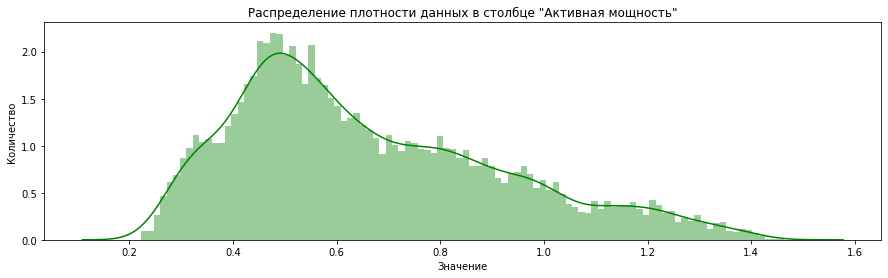

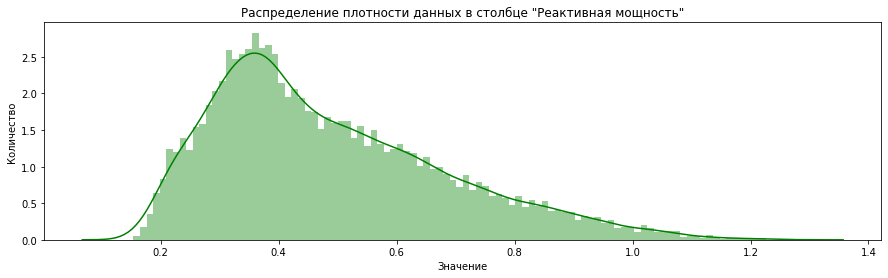

In [20]:
# Посмотрим на плотность распределения мощности датафрейма
draw_hist(data_arc_new)

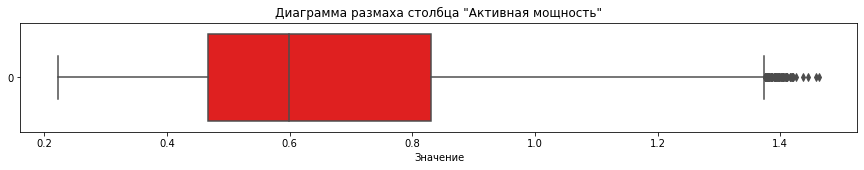

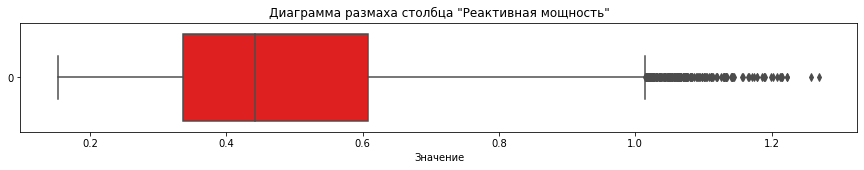

In [21]:
# Посмотрим отображение ящика с усами для датафрейма
draw_box(data_arc_new)

In [22]:
# Добавим два новых поля
data_arc_new["Длительность нагрева дугой"] = (
    data_arc_new["Конец нагрева дугой"] - data_arc_new["Начало нагрева дугой"]
).dt.total_seconds()

data_arc_new["Затраты электроэнергии"] = (
    data_arc_new["Длительность нагрева дугой"] * data_arc_new["Активная мощность"]
)

In [23]:
# Агрегируем данные
data_arc_new_agg = data_arc_new.pivot_table(
    index=["key"],
    values=[
        "Активная мощность",
        "Длительность нагрева дугой",
        "Затраты электроэнергии",
    ],
    aggfunc=["sum"],
)
data_arc_new_agg = data_arc_new_agg.reset_index()
data_arc_new_agg.columns = [
    "key",
    "Сумма активной мощностм",
    "Сумма длительностм нагрева дугой",
    "Сумма затрат электроэнергии",
]

**Итог по п. 1.1.1**

- произведена замена данных мощностей.
- произведена замена типа полей с датами.
- избавились от выброса Реактивной мощности.
- гистограммы распределений похожи, по форме напоминают распределение Пуассона.
- диаграмма размаха показывает некоторое количество выбросов (за максимальным НЕ выбросом). При необходимости обработаем их позже.

### Просмотр датафрейма с данными о подаче сыпучих материалов (объём)
<a name="1.2"></a>

In [24]:
# Создадим датафрейм и сохраним в него данные
data_bulk_new = files_dict['data_bulk_new']

In [25]:
# Посмотрим информацию о датафрейме
data_info(data_bulk_new)

Размер датасета:


(3129, 16)


Первые три значения датасета:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0



Последние три значения датасета:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0



Информация датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB

Описание датасета:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000



Количествово пропусков:key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64



'Количествово дубликатов:0'


Уникальные значения датасета:


key        3129
Bulk 1       47
Bulk 2       15
Bulk 3      278
Bulk 4      206
Bulk 5       55
Bulk 6      205
Bulk 7       25
Bulk 8        1
Bulk 9       10
Bulk 10      77
Bulk 11     101
Bulk 12     331
Bulk 13      14
Bulk 14     284
Bulk 15     156
dtype: int64

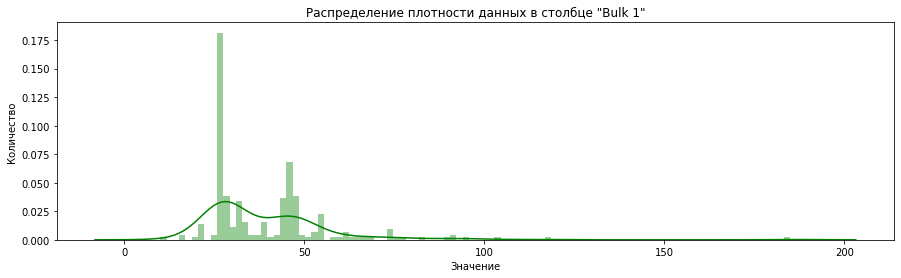

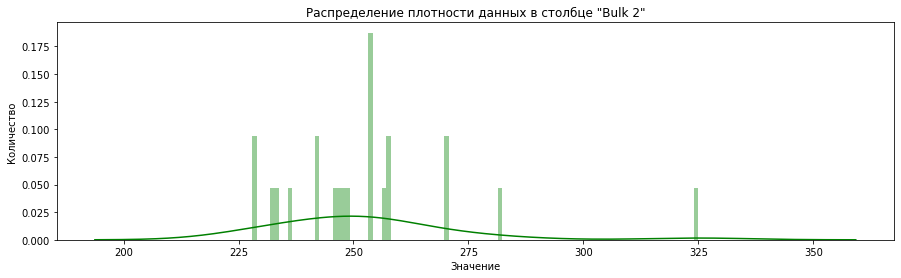

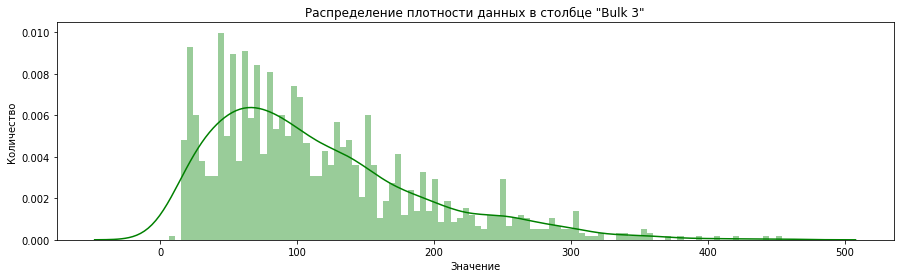

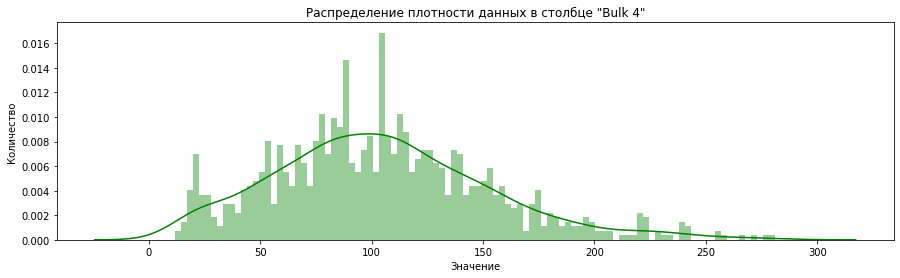

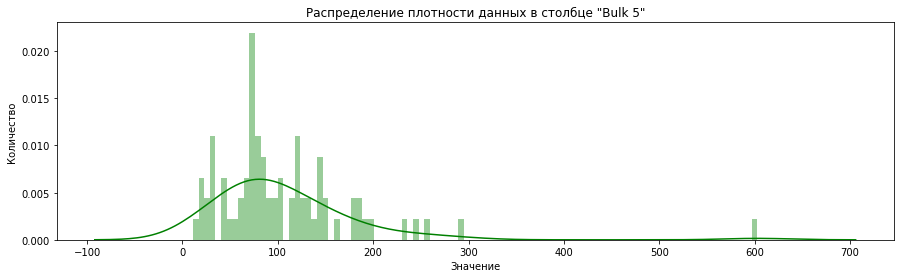

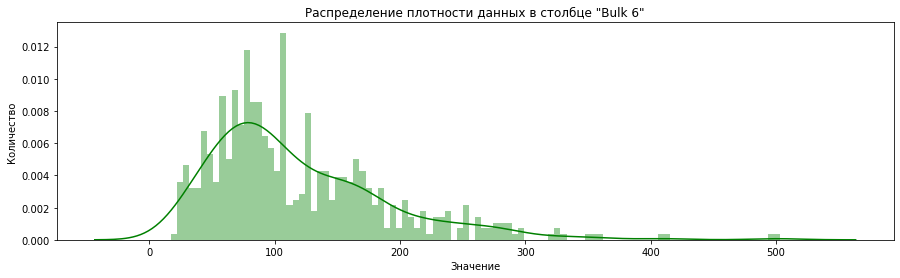

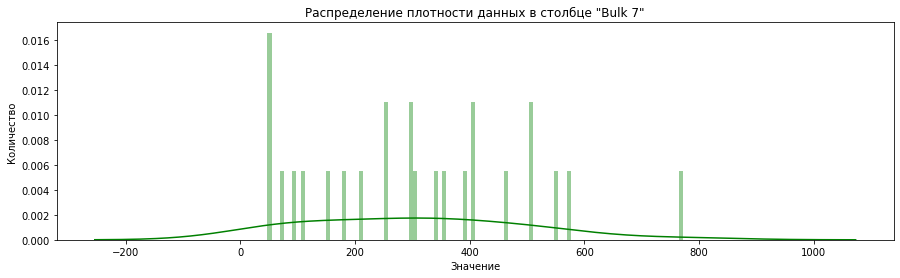

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


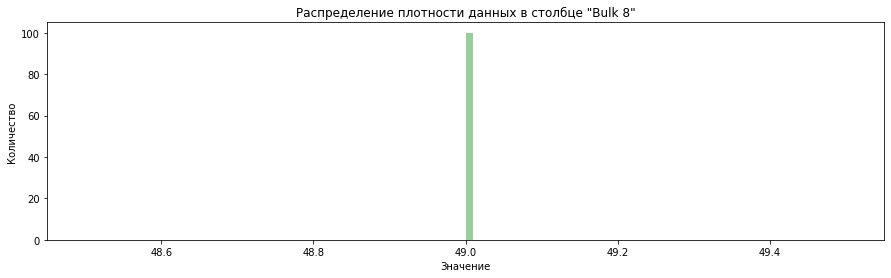

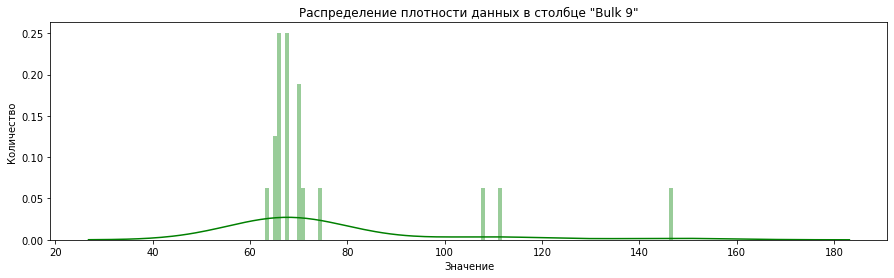

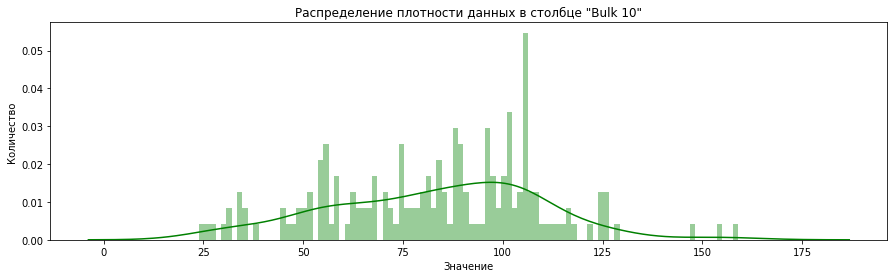

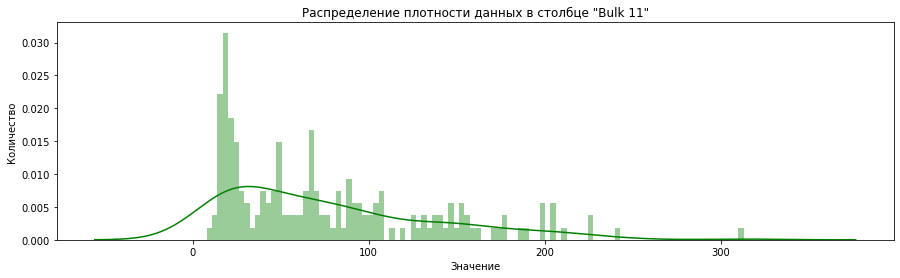

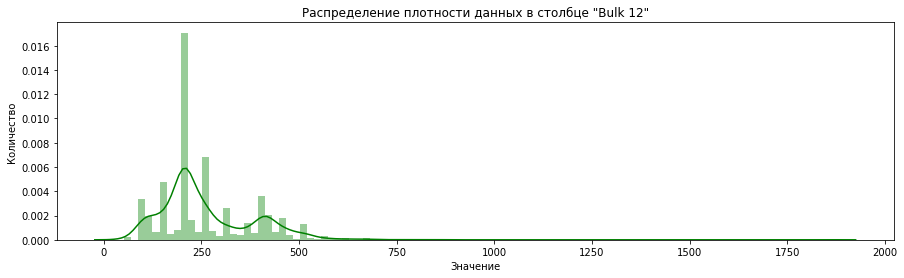

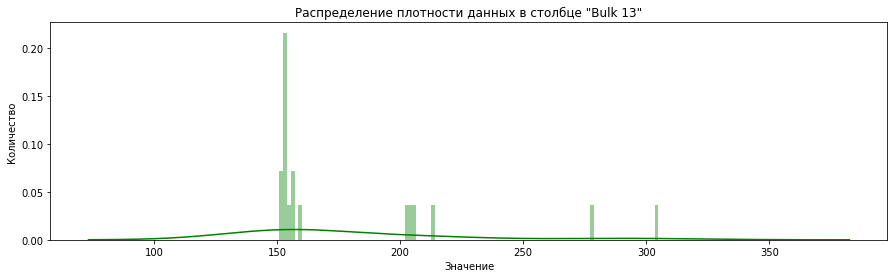

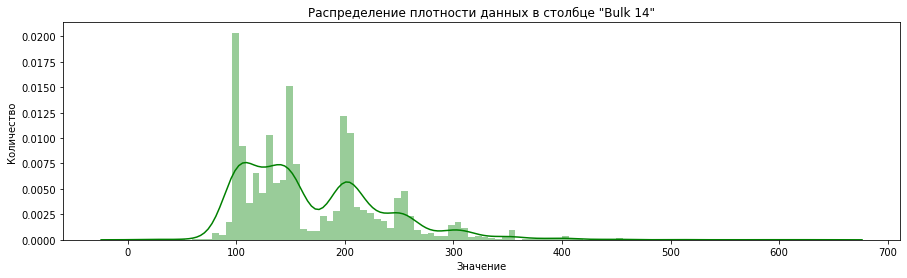

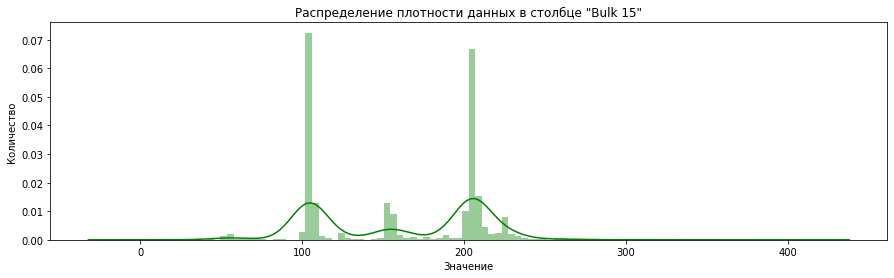

In [26]:
# Посмотрим на плотность распределения мощности датафрейма
draw_hist1(data_bulk_new)

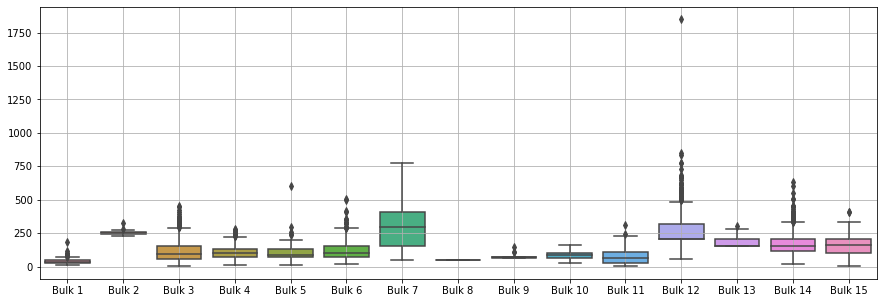

In [27]:
# Посмотрим отображение ящика с усами для датафрейма
draw_box2(data_bulk_new)

**Итог по п. 1.2:**

- были загружены данные. 
- выведена общая информация по датасету о подаче сыпучих материалов (объём).
- всего даных 3129.
- дубликаты отсутствуют. 
- пропусков много во всех столбцах.
- присутствуют выбросы.

#### EDA и предобработка данных о подаче сыпучих материалов (объём)
<a name="1.2.1"></a>

Материал номер 8 был добавлен всего в одну партию. Наименьшее количество использований из оставшихся материалов характерно для материалов 2, 9 и 13, они добавлялись в 22, 19 и 17 партий стали соответственно. Явно ошибочных значений в представленной таблице нет. Минимальный объем добавок во всех случаях положителен, максимальные объемы для большинства добавок составляют от 185 до 635, для материала 12 - максимальный объем составляет 1849, что выделяет его среди других значений. Единичное значение объема 1849 для материала под номером 12 действительно похож на выброс, но это не точно, поэтому на данном этапе оставим значение без изменений.

In [28]:
# Заменим пропуски на нули, так как они значат, что присадки в этот момент не добавляли
data_bulk_new = data_bulk_new.fillna(0)

In [29]:
# Проверим отсутствие пропусков
data_bulk_new.isna().sum()

key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     0
Bulk 8     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64

In [30]:
# Пропусков меньше 67% у столбцов 'Bulk 3','Bulk 12','Bulk 14','Bulk 15'. их оставлю, остальные удалю
data_bulk_new = data_bulk_new[['key', 'Bulk 3','Bulk 12','Bulk 14','Bulk 15']]

**Итог по п. 1.2.1**

- произведена замена данных с пропусками на 0.
- проверили, что пропусков не осталось.
- избавились от столбцов с единичными данными или данными с большим количеством NaN, так как они не репрезентативны.

### Просмотр датафрейма с данными о подаче сыпучих материалов (время)
<a name="1.3"></a>

In [31]:
# Создадим датафрейм и сохраним в него данные
data_bulk_time_new = files_dict['data_bulk_time_new']

In [32]:
# Посмотрим информацию о датафрейме
data_info(data_bulk_time_new)

Размер датасета:


(3129, 16)


Первые три значения датасета:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16



Последние три значения датасета:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16



Информация датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB

Описание датасета:


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000



Количествово пропусков:key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64



'Количествово дубликатов:0'


Уникальные значения датасета:


key        3129
Bulk 1      252
Bulk 2       22
Bulk 3     1298
Bulk 4     1014
Bulk 5       77
Bulk 6      576
Bulk 7       25
Bulk 8        1
Bulk 9       19
Bulk 10     176
Bulk 11     177
Bulk 12    2450
Bulk 13      18
Bulk 14    2806
Bulk 15    2248
dtype: int64

**Итог по п. 1.3:**

- были загружены данные. 
- выведена общая информация по датасету о подаче сыпучих материалов (время).
- всего даных 3129.
- дубликаты отсутствуют. 
- пропусков много во всех столбцах.

#### EDA и предобработка данных о подаче сыпучих материалов (время)
<a name="1.3.1"></a>

Время добавления материала не так критично, как Время варки (то есть полного технологического процесса), поэтому не будем его учитывать в исследовании.

### Просмотр датафрейма с данными о продувке сплава газом
<a name="1.4"></a>

In [37]:
# Создадим датафрейм и сохраним в него данные
data_gas_new = files_dict['data_gas_new']

In [38]:
# Посмотрим информацию о датафрейме
data_info(data_gas_new)

Размер датасета:


(3239, 2)


Первые три значения датасета:


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793



Последние три значения датасета:


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793



Информация датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB

Описание датасета:


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040



Количествово пропусков:key      0
Газ 1    0
dtype: int64



'Количествово дубликатов:0'


Уникальные значения датасета:


key      3239
Газ 1    3239
dtype: int64

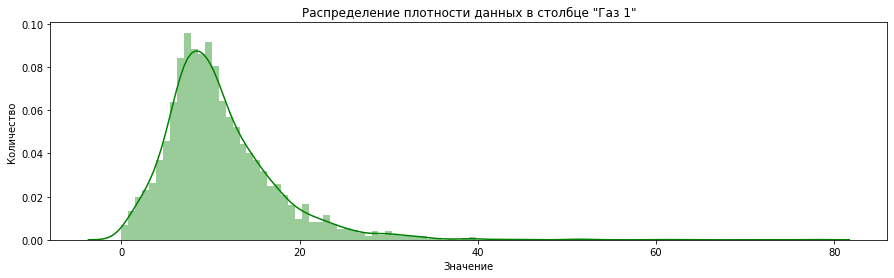

In [39]:
# Посмотрим на плотность распределения мощности датафрейма
draw_hist1(data_gas_new)

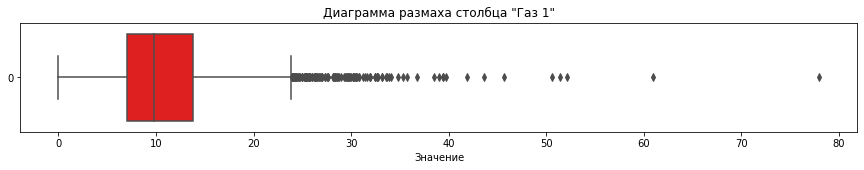

In [40]:
# Посмотрим отображение ящика с усами для датафрейма
draw_box1(data_gas_new)

**Итог по п. 1.4:**

- были загружены данные.
- выведена общая информация по датасету о продувке сплава газом.
- всего даных 3239.
- дубликаты отсутствуют.
- пропуски отсутствуют.
- присутствуют выбросы.

#### EDA и предобработка данных о продувке сплава газом
<a name="1.4.1"></a>

Объем подаваемого газа составляет в среднем 10 м3, в некоторых случаях достигая 40-80 м3. Т.к. на данном этапе нет информации о допустимых границах этого параметра технологическом процессе, оставим все имеющиеся значения без изменения.

### Просмотр датафрейма с данными об измерении температуры
<a name="1.5"></a>

In [41]:
# Создадим датафрейм и сохраним в него данные
data_temp_new = files_dict['data_temp_new']

In [42]:
# Посмотрим информацию о датафрейме
data_info(data_temp_new)

Размер датасета:


(18092, 3)


Первые три значения датасета:


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0



Последние три значения датасета:


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0



Информация датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB

Описание датасета:


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000



Количествово пропусков:key                0
Время замера       0
Температура     3427
dtype: int64



'Количествово дубликатов:0'


Уникальные значения датасета:


key              3216
Время замера    18092
Температура       172
dtype: int64

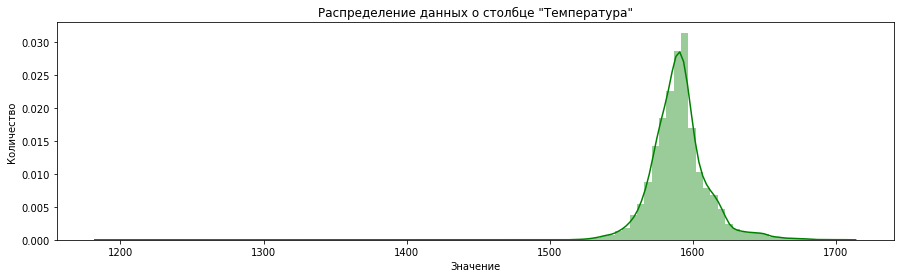

In [43]:
# Посмотрим на плотность распределения мощности датафрейма
for i in data_temp_new.drop(['key','Время замера'], axis=1):
    plt.figure(figsize=(15,4))
    sns.distplot(data_temp_new[i], bins=100, color='green')
    plt.title('Распределение данных о столбце "Температура"')
    plt.xlabel('Значение')
    plt.ylabel('Количество')
    plt.show();

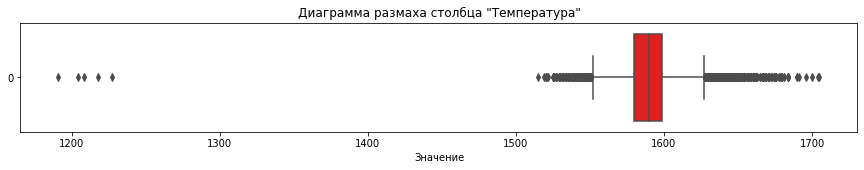

In [44]:
# Посмотрим отображение ящика с усами для датафрейма
for i in data_temp_new.drop(['key','Время замера'], axis=1):
    plt.figure(figsize=(15,2))
    sns.boxplot(data=data_temp_new[i], orient='h', color='red')
    plt.title(f'Диаграмма размаха столбца "{i}"')
    plt.xlabel('Значение')
    plt.show();

**Итог по п. 1.5:**

- были загружены данные.
- выведена общая информация по датасету об измерении температуры.
- всего даных 18092.
- дубликаты отсутствуют.
- пропуски присутствуют в столбце Температура.
- присутствуют выбросы.

#### EDA и предобработка данных об измерении температуры
<a name="1.5.1"></a>

Удалению подлежит партия с температурой плавления < 1300, так как это неверные данные (являются нетипичными для данного технологического процесса). Температура плавления в нашем случае в принципе равна 1400 градусов.

In [45]:
# Удалим лишние данные
key_low_temp = data_temp_new.loc[data_temp_new['Температура'] < 1300, 'key'].values
data_temp_new = data_temp_new.query('key not in @key_low_temp')

In [46]:
# Проверка неудалённых партий по температуре
data_temp_new.loc[data_temp_new['Температура'] < 1300]

,key,Время замера,Температура


In [47]:
# Преобразуем данные в формат datetime
data_temp_new['Время замера'] = pd.to_datetime(data_temp_new['Время замера'], format='%Y-%m-%d %H:%M:%S')

In [48]:
# Удалим данные, когда температура не возрастала, так как это испортит расчеты
temp_isna = data_temp_new.loc[data_temp_new['Температура'].isna(),'key'].values
display(data_temp_new.query('key in @temp_isna').head())
data_temp_new = data_temp_new.query('key not in @temp_isna')

,key,Время замера,Температура
13926,2500,2019-08-10 14:04:39,1539.0
13927,2500,2019-08-10 14:13:11,NaN
13928,2500,2019-08-10 14:18:12,NaN
13929,2500,2019-08-10 14:25:53,NaN
13930,2500,2019-08-10 14:29:39,NaN


In [49]:
# Посчитаем количество пропусков
data_temp_new.isna().sum()

key             0
Время замера    0
Температура     0
dtype: int64

In [50]:
# Удалим партии с одним замером температуры
count = data_temp_new['key'].value_counts()
temp_ones = count.loc[count==1].index.values
display(data_temp_new.query('key in @temp_ones'))
data_temp_new = data_temp_new.query('key not in @temp_ones')

,key,Время замера,Температура
1105,195,2019-05-11 00:01:36,1583.0
1549,279,2019-05-14 10:13:01,1603.0


In [51]:
# Отсортируем данные
data_temp_new = data_temp_new.sort_values(by=['key', 'Время замера'])
# Агрегируем данные температуры
temp_agg = data_temp_new.pivot_table(index=['key'], values=['Температура'], aggfunc=['first', 'last'])
temp_agg = temp_agg.reset_index()
temp_agg.columns = ['key', 'Первая температура', 'Последняя температура']
temp_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   key                    2471 non-null   int64  
 1   Первая температура     2471 non-null   float64
 2   Последняя температура  2471 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 58.0 KB


In [52]:
# Агрегируем данные времени замера
temp_time_agg = data_temp_new.pivot_table(index=['key'], values=['Время замера'], aggfunc=['first', 'last'])
temp_time_agg = temp_time_agg.reset_index()
temp_time_agg.columns = ['key', 'Первый замер', 'Последний замер']
temp_time_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   key              2471 non-null   int64         
 1   Первый замер     2471 non-null   datetime64[ns]
 2   Последний замер  2471 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 58.0 KB


In [53]:
# Избавимся от лишних данных
temp_time_agg['Время варки'] = (temp_time_agg['Последний замер'] - temp_time_agg['Первый замер']).dt.seconds
temp_time_agg = temp_time_agg.drop(['Первый замер', 'Последний замер'], axis=1)
temp_time_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   key          2471 non-null   int64
 1   Время варки  2471 non-null   int64
dtypes: int64(2)
memory usage: 38.7 KB


In [54]:
# Соберем все полученные данные воедино
data_temp_new_agg = pd.merge(temp_agg, temp_time_agg, on='key', how='inner')
data_temp_new_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 0 to 2470
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   key                    2471 non-null   int64  
 1   Первая температура     2471 non-null   float64
 2   Последняя температура  2471 non-null   float64
 3   Время варки            2471 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 96.5 KB


**Итог по п. 1.5.1**

- удалили данные с температурой плавления < 1300
- произведена замена типа полей с датами.
- удалили данные, когда температура не возрастала.
- проверили, что пропусков не осталось.
- удалили данные с одним замером температуры.
- агрегировали данные температуры.
- агрегировали данные времени замера.
- избавились от лишних данных.
- использовали функцию merge для объединения вышеуказанных данных.

In [55]:
data_temp_new_agg

,key,Первая температура,Последняя температура,Время варки
0,1,1571.0,1613.0,1714
1,2,1581.0,1602.0,1265
2,3,1596.0,1599.0,1753
3,4,1601.0,1625.0,1220
4,5,1576.0,1602.0,1536
...,...,...,...,...
2466,2495,1570.0,1591.0,1380
2467,2496,1554.0,1591.0,1705
2468,2497,1571.0,1589.0,962
2469,2498,1591.0,1594.0,1520


### Просмотр датафрейма с данными о проволочных материалах (объём)
<a name="1.6"></a>

In [56]:
# Создадим датафрейм и сохраним в него данные
data_wire_new = files_dict['data_wire_new']

In [57]:
# Посмотрим информацию о датафрейме
data_info(data_wire_new)

Размер датасета:


(3081, 10)


Первые три значения датасета:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Последние три значения датасета:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Информация датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB

Описание датасета:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604



Количествово пропусков:key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64



'Количествово дубликатов:0'


Уникальные значения датасета:


key       3081
Wire 1    2251
Wire 2     713
Wire 3      56
Wire 4      14
Wire 5       1
Wire 6      69
Wire 7      10
Wire 8      13
Wire 9      25
dtype: int64

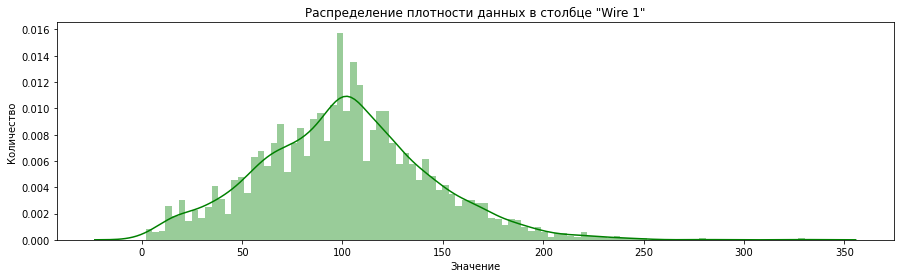

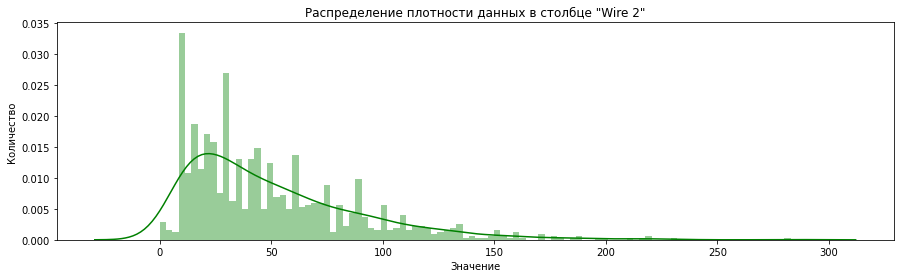

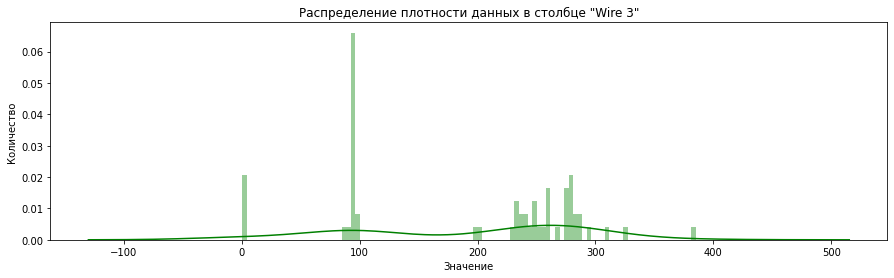

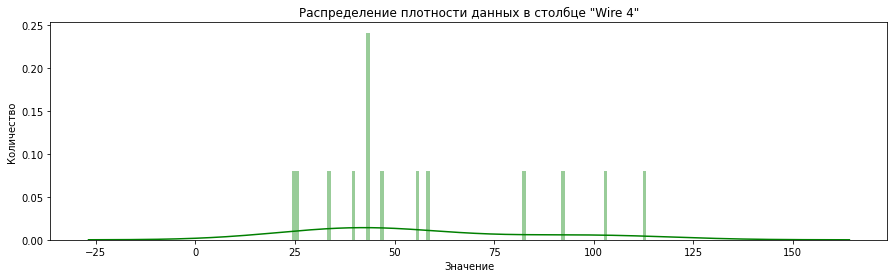

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


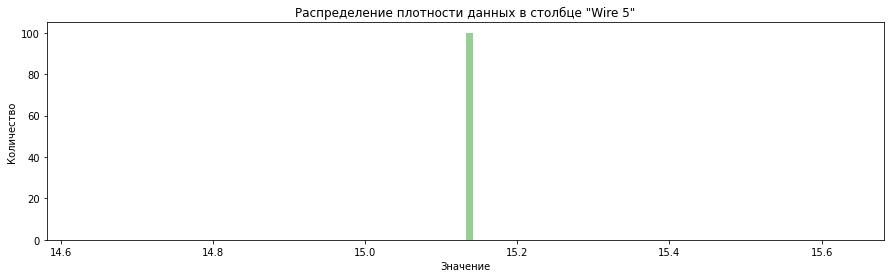

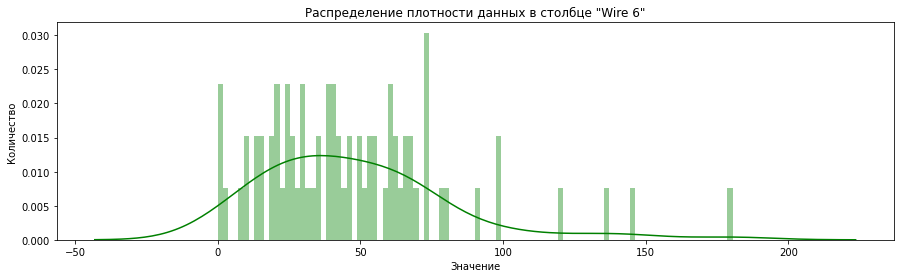

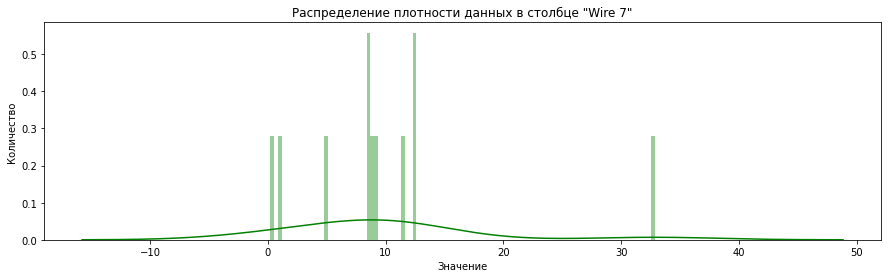

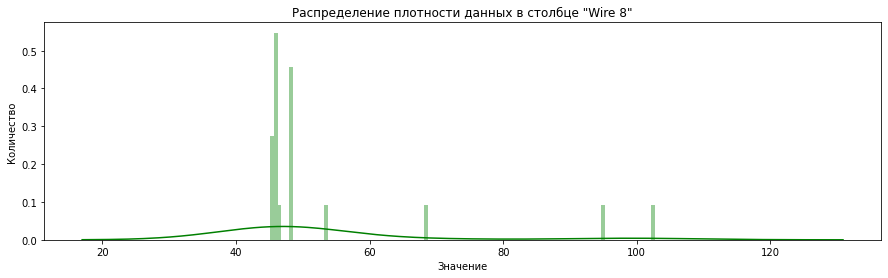

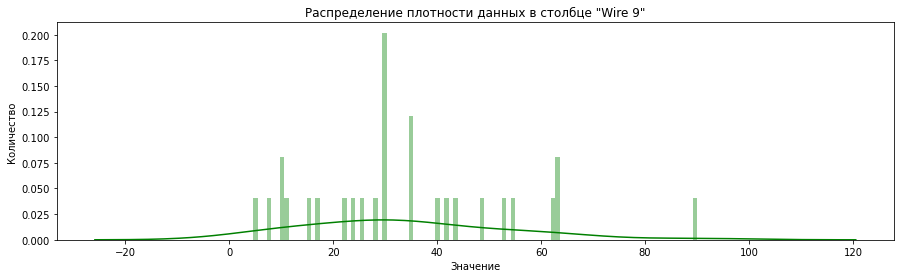

In [58]:
# Посмотрим на плотность распределения мощности датафрейма
draw_hist1(data_wire_new)

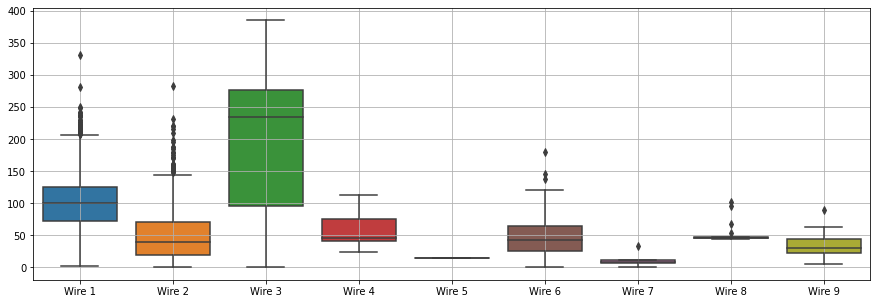

In [59]:
# Посмотрим отображение ящика с усами для датафрейма
draw_box2(data_wire_new)

**Итог по п. 1.6:**

- были загружены данные.
- выведена общая информация по датасету о проволочных материалах (объём).
- всего даных 3081.
- дубликаты отсутствуют.
- пропуски присутствуют в разных столбцах.
- присутствуют выбросы.

#### EDA и предобработка данных о проволочных материалах (объём)
<a name="1.6.1"></a>

Проволочный материал №5 применили только в одном случае, материал №1 применяли практически всегда, также достаточно часто (более чем для трети партий) применялся материал №2, остальные материалы применялись от 11 до 73 раз.

In [60]:
# Заменим пропуски на нули, так как они значат, что присадки в этот момент не добавляли
data_wire_new = data_wire_new.fillna(0)

In [61]:
# Проверим отсутствие пропусков
data_wire_new.isna().sum()

key       0
Wire 1    0
Wire 2    0
Wire 3    0
Wire 4    0
Wire 5    0
Wire 6    0
Wire 7    0
Wire 8    0
Wire 9    0
dtype: int64

In [62]:
# Пропусков меньше 67% у столбцов 'Wire 1','Wire 2', остальные удаляем
data_wire_new = data_wire_new[['key', 'Wire 1','Wire 2']]

**Итог по п. 1.6.1**

- произведена замена данных с пропусками на 0.
- проверили, что пропусков не осталось.
- избавились от столбцов с большим количеством NaN, так как они не репрезентативны.

### Просмотр датафрейма с данными о проволочных материалах (время)
<a name="1.7"></a>

In [63]:
# Создадим датафрейм и сохраним в него данные
data_wire_time_new = files_dict['data_wire_time_new']

In [64]:
# Посмотрим информацию о датафрейме
data_info(data_wire_time_new)

Размер датасета:


(3081, 10)


Первые три значения датасета:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Последние три значения датасета:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Информация датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB

Описание датасета:


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000



Количествово пропусков:key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64



'Количествово дубликатов:0'


Уникальные значения датасета:


key       3081
Wire 1    3055
Wire 2    1079
Wire 3      63
Wire 4      14
Wire 5       1
Wire 6      73
Wire 7      11
Wire 8      19
Wire 9      29
dtype: int64

**Итог по п. 1.7:**

- были загружены данные.
- выведена общая информация по датасету о проволочных материалах (объём).
- всего даных 3081.
- дубликаты отсутствуют.
- пропуски присутствуют в разных столбцах.

#### EDA и предобработка данных о проволочных материалах (время)
<a name="1.7.1"></a>

Время добавления материала не так критично, как Время варки (то есть полного технологического процесса), поэтому не будем его учитывать в исследовании.

## Анализ объединенных данных
<a name="2"></a>

Берем данные, которые есть ТОЛЬКО во всех таблицах, из-за отсутствия данных остальные анализировать нет возможности.

In [68]:
# Объединим полученные данные по ключу
df = pd.merge(data_arc_new_agg, data_bulk_new, on='key', how='inner')
df = pd.merge(df, data_gas_new, on='key', how='inner')
df = pd.merge(df, data_temp_new_agg, on='key', how='inner')
df = pd.merge(df, data_wire_new, on='key', how='inner')
df#.head(2)

,key,Сумма активной мощностм,Сумма длительностм нагрева дугой,Сумма затрат электроэнергии,Bulk 3,Bulk 12,Bulk 14,Bulk 15,Газ 1,Первая температура,Последняя температура,Время варки,Wire 1,Wire 2
0,1,3.036730,1098.0,628.616930,0.0,206.0,150.0,154.0,29.749986,1571.0,1613.0,1714,60.059998,0.00000
1,2,2.139408,811.0,395.281800,0.0,206.0,149.0,154.0,12.555561,1581.0,1602.0,1265,96.052315,0.00000
2,3,4.063641,655.0,581.774624,0.0,205.0,152.0,153.0,28.554793,1596.0,1599.0,1753,91.160157,0.00000
3,4,2.706489,741.0,543.710274,0.0,207.0,153.0,154.0,18.841219,1601.0,1625.0,1220,89.063515,0.00000
4,5,2.252950,869.0,412.180480,0.0,203.0,151.0,152.0,5.413692,1576.0,1602.0,1536,89.238236,9.11456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2495,3.168133,723.0,571.539318,21.0,256.0,129.0,223.0,7.125735,1570.0,1591.0,1380,89.150879,0.00000
2321,2496,4.174918,940.0,675.222467,0.0,256.0,129.0,226.0,9.412616,1554.0,1591.0,1705,114.179527,0.00000
2322,2497,3.605239,569.0,680.326674,0.0,230.0,124.0,226.0,6.271699,1571.0,1589.0,962,94.086723,9.04800
2323,2498,3.202310,750.0,474.918795,90.0,206.0,129.0,207.0,14.953657,1591.0,1594.0,1520,118.110717,0.00000


In [69]:
features = df.drop(['Последняя температура', 'key'], axis=1)
target = df['Последняя температура']

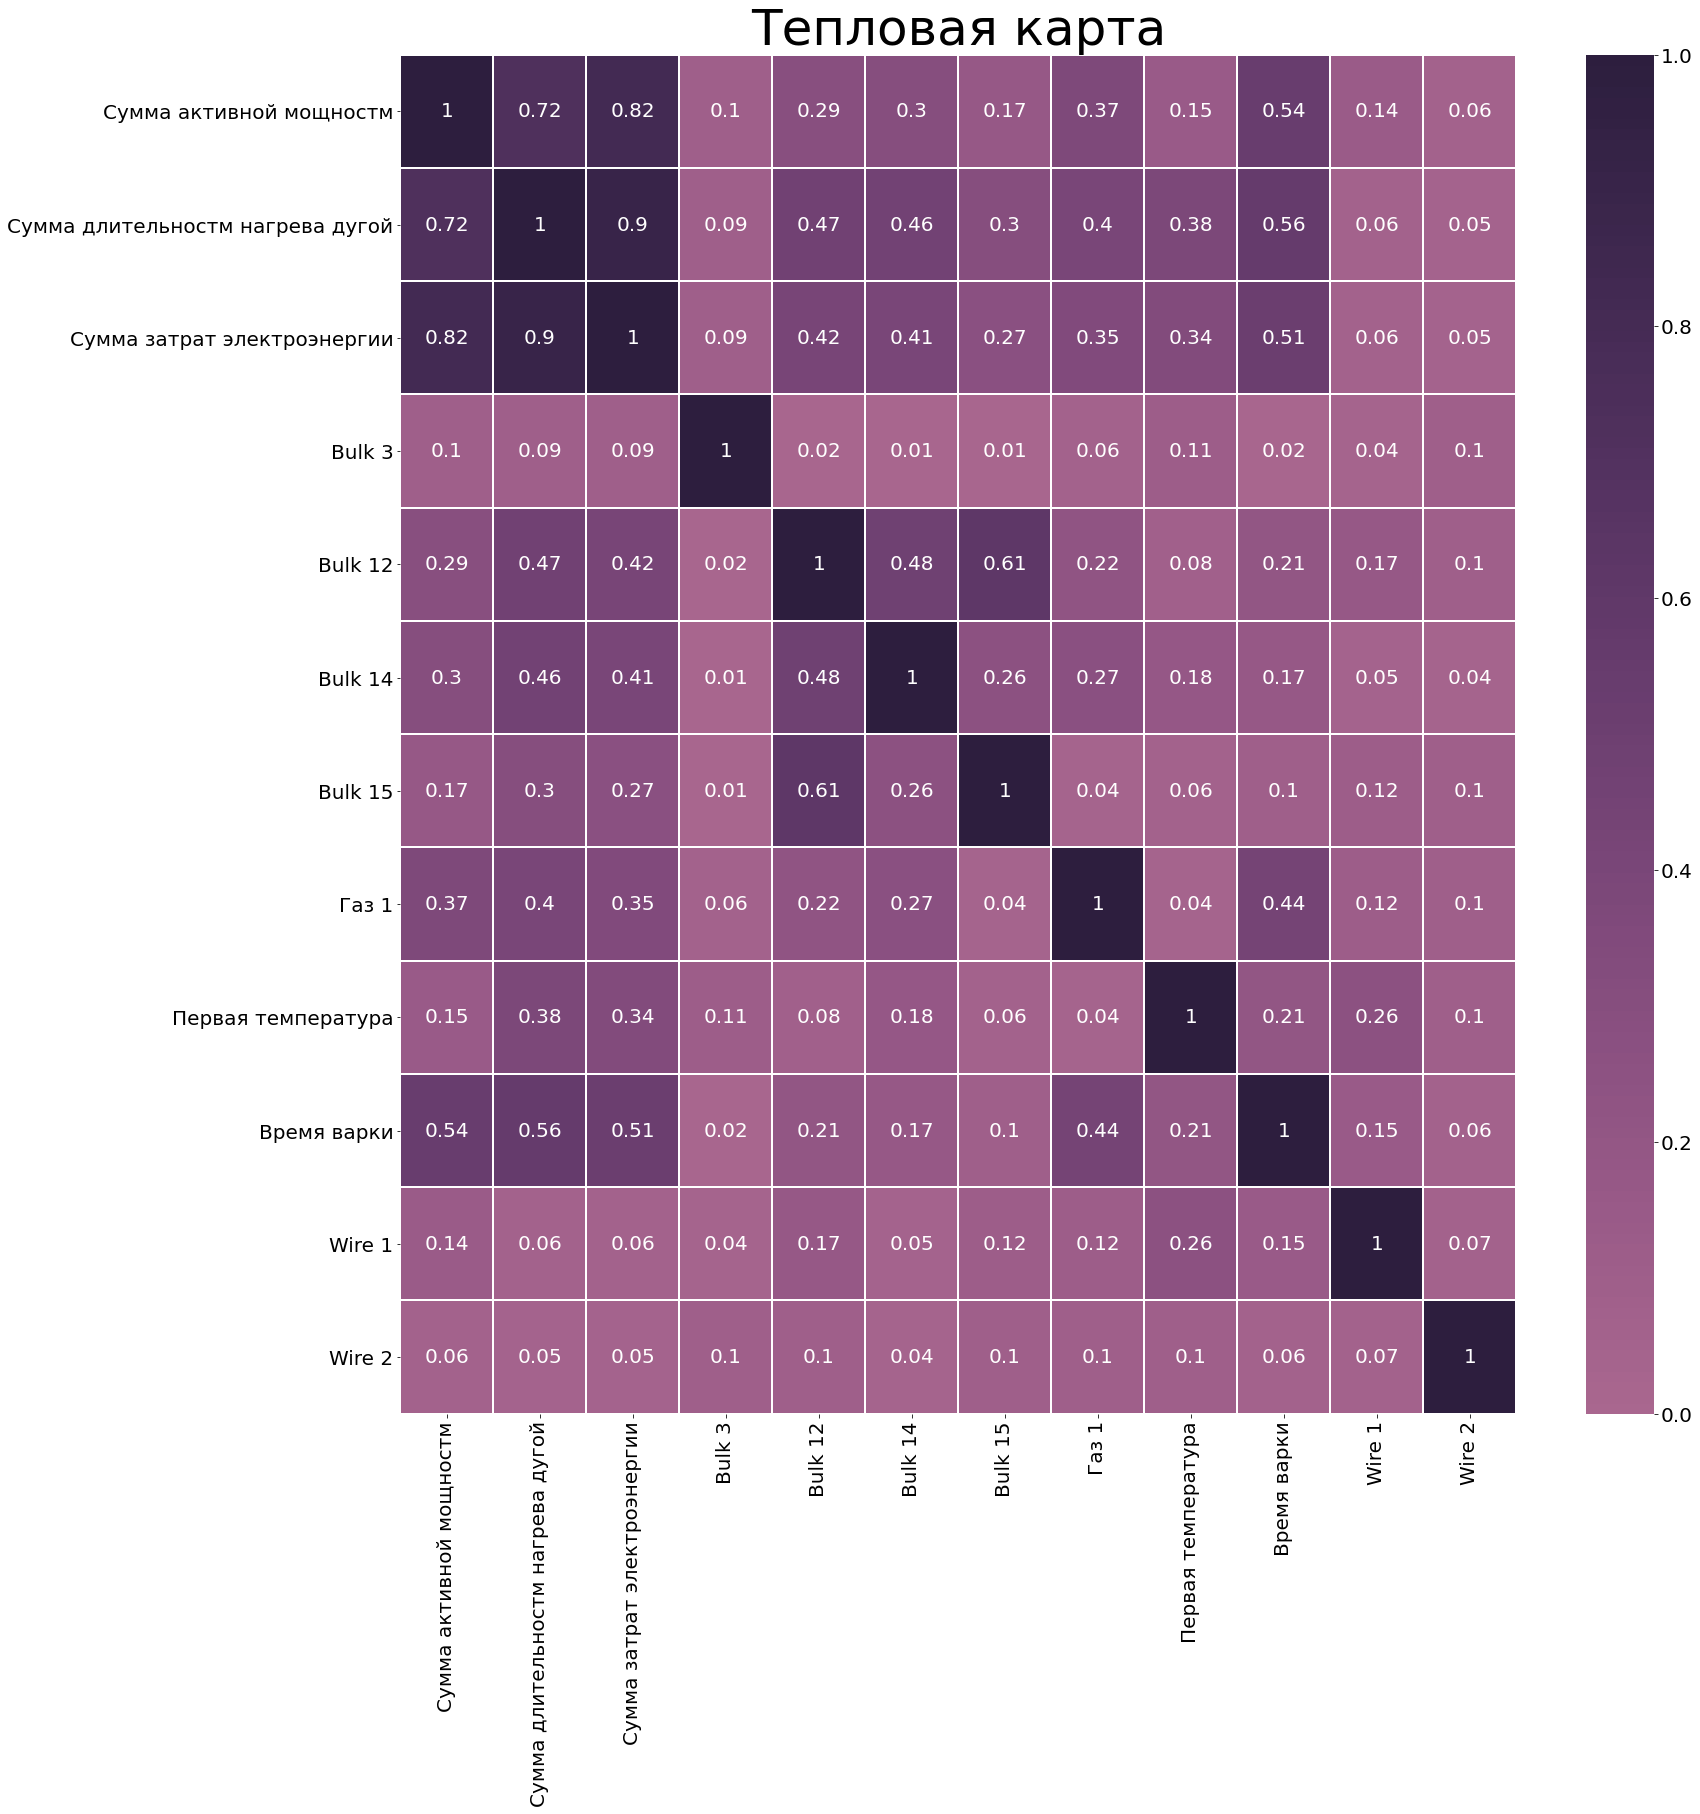

In [70]:
font = {'size': 20}
plt.rc('font', **font)
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(round(abs(features.corr()), 2),
                      annot=True,
                      cmap=sns.cubehelix_palette(as_cmap=True),
                      vmax=1, 
                      vmin=0, 
                      center=0,
                      linewidths=1,
                      fmt='.2g')
heatmap.set_title('Тепловая карта', fontsize=50);

In [71]:
# Посмотрим информацию о датафрейме
data_info(df)

Размер датасета:


(2325, 14)


Первые три значения датасета:


,key,Сумма активной мощностм,Сумма длительностм нагрева дугой,Сумма затрат электроэнергии,Bulk 3,Bulk 12,Bulk 14,Bulk 15,Газ 1,Первая температура,Последняя температура,Время варки,Wire 1,Wire 2
0,1,3.036730,1098.0,628.616930,0.0,206.0,150.0,154.0,29.749986,1571.0,1613.0,1714,60.059998,0.0
1,2,2.139408,811.0,395.281800,0.0,206.0,149.0,154.0,12.555561,1581.0,1602.0,1265,96.052315,0.0
2,3,4.063641,655.0,581.774624,0.0,205.0,152.0,153.0,28.554793,1596.0,1599.0,1753,91.160157,0.0



Последние три значения датасета:


,key,Сумма активной мощностм,Сумма длительностм нагрева дугой,Сумма затрат электроэнергии,Bulk 3,Bulk 12,Bulk 14,Bulk 15,Газ 1,Первая температура,Последняя температура,Время варки,Wire 1,Wire 2
0,1,3.036730,1098.0,628.616930,0.0,206.0,150.0,154.0,29.749986,1571.0,1613.0,1714,60.059998,0.0
1,2,2.139408,811.0,395.281800,0.0,206.0,149.0,154.0,12.555561,1581.0,1602.0,1265,96.052315,0.0
2,3,4.063641,655.0,581.774624,0.0,205.0,152.0,153.0,28.554793,1596.0,1599.0,1753,91.160157,0.0



Информация датасета:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   key                               2325 non-null   int64  
 1   Сумма активной мощностм           2325 non-null   float64
 2   Сумма длительностм нагрева дугой  2325 non-null   float64
 3   Сумма затрат электроэнергии       2325 non-null   float64
 4   Bulk 3                            2325 non-null   float64
 5   Bulk 12                           2325 non-null   float64
 6   Bulk 14                           2325 non-null   float64
 7   Bulk 15                           2325 non-null   float64
 8   Газ 1                             2325 non-null   float64
 9   Первая температура                2325 non-null   float64
 10  Последняя температура             2325 non-null   float64
 11  Время варки                       2325 non-null

,key,Сумма активной мощностм,Сумма длительностм нагрева дугой,Сумма затрат электроэнергии,Bulk 3,Bulk 12,Bulk 14,Bulk 15,Газ 1,Первая температура,Последняя температура,Время варки,Wire 1,Wire 2
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000
mean,1251.512258,3.126116,808.035269,539.273463,47.296774,208.507957,153.971613,120.026667,11.378942,1587.365161,1593.366022,2323.419785,102.412198,17.605637
std,715.099053,1.220263,340.829330,257.298107,75.228262,157.137873,81.398153,84.674380,6.395632,23.623144,11.209581,1385.569302,43.535263,33.642919
min,1.000000,0.267676,57.000000,26.187544,0.000000,0.000000,0.000000,0.000000,0.008399,1519.000000,1541.000000,339.000000,0.000000,0.000000
25%,629.000000,2.296007,581.000000,368.206194,0.000000,105.000000,105.000000,0.000000,7.282948,1571.000000,1587.000000,1581.000000,73.207679,0.000000
50%,1255.000000,3.036303,778.000000,508.453259,0.000000,206.000000,149.000000,107.000000,10.100950,1587.000000,1593.000000,2046.000000,101.087998,0.000000
75%,1868.000000,3.834300,993.000000,679.062253,80.000000,283.000000,204.000000,204.000000,14.217691,1603.000000,1598.000000,2793.000000,128.069763,23.102560
max,2499.000000,12.375636,4189.000000,3718.054401,454.000000,1849.000000,636.000000,405.000000,77.995040,1660.000000,1653.000000,23674.000000,330.314424,282.780152



Количествово пропусков:key                                 0
Сумма активной мощностм             0
Сумма длительностм нагрева дугой    0
Сумма затрат электроэнергии         0
Bulk 3                              0
Bulk 12                             0
Bulk 14                             0
Bulk 15                             0
Газ 1                               0
Первая температура                  0
Последняя температура               0
Время варки                         0
Wire 1                              0
Wire 2                              0
dtype: int64



'Количествово дубликатов:0'


Уникальные значения датасета:


key                                 2325
Сумма активной мощностм             2325
Сумма длительностм нагрева дугой    1060
Сумма затрат электроэнергии         2325
Bulk 3                               265
Bulk 12                              303
Bulk 14                              254
Bulk 15                              143
Газ 1                               2325
Первая температура                   133
Последняя температура                 75
Время варки                         1630
Wire 1                              1810
Wire 2                               563
dtype: int64

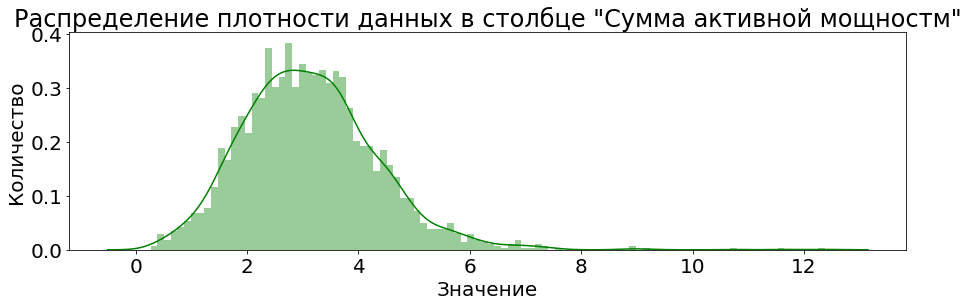

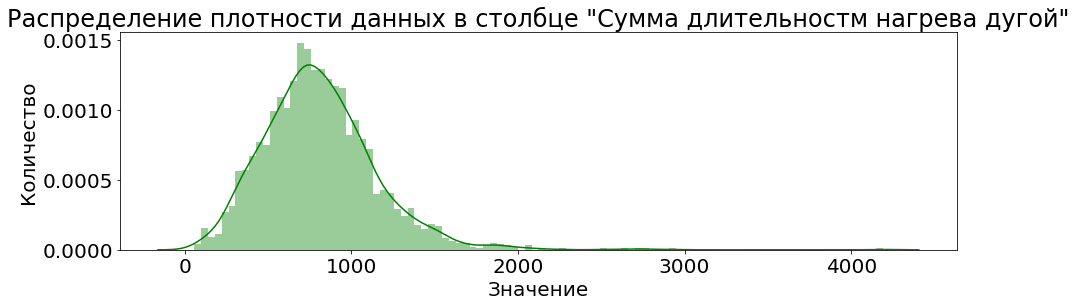

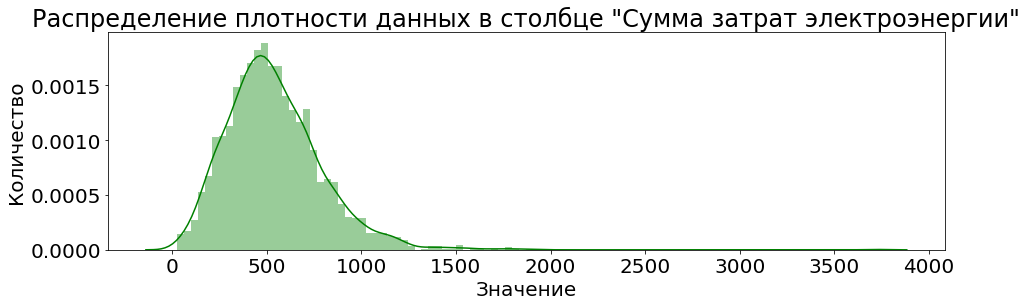

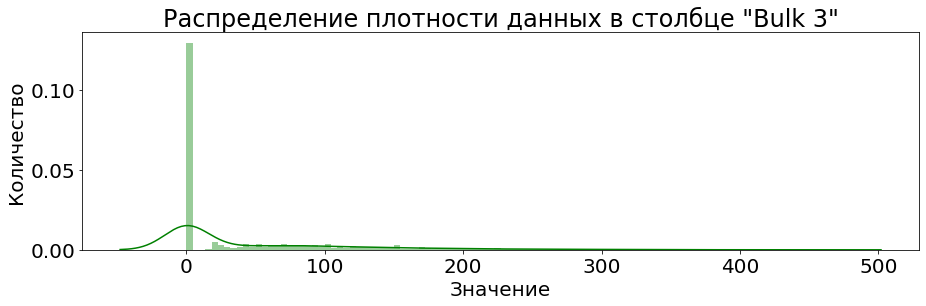

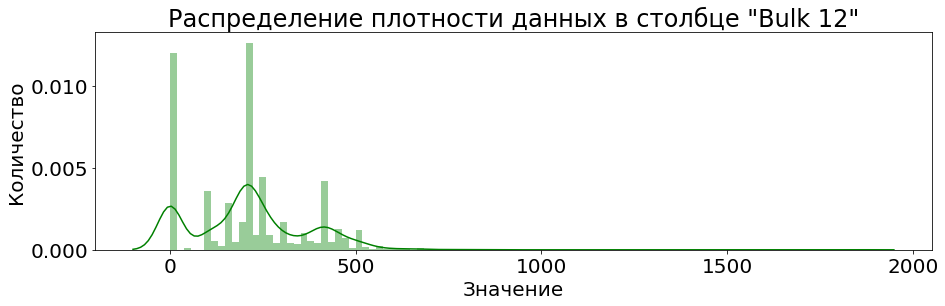

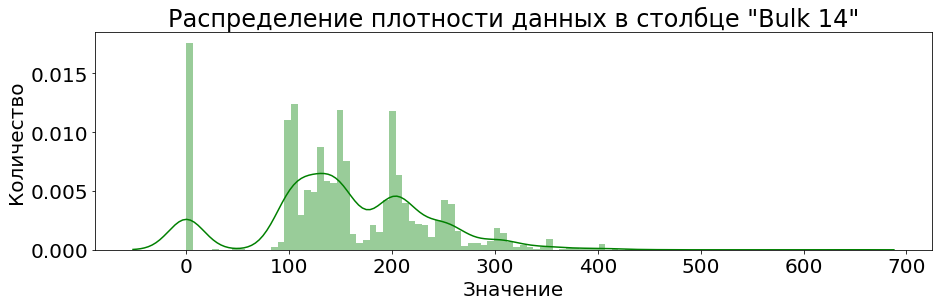

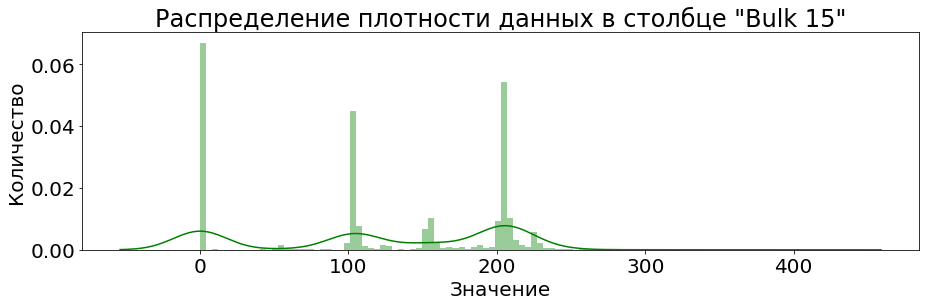

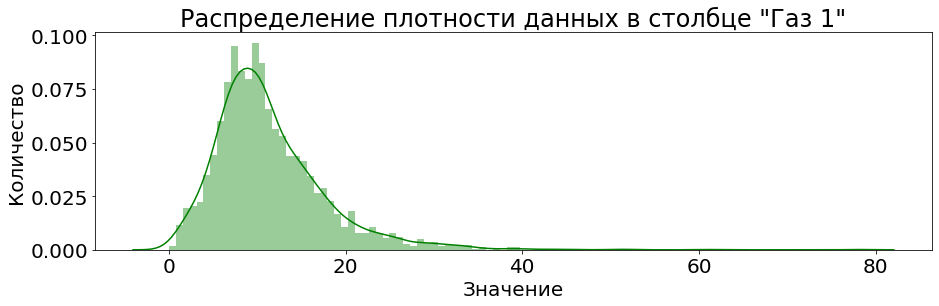

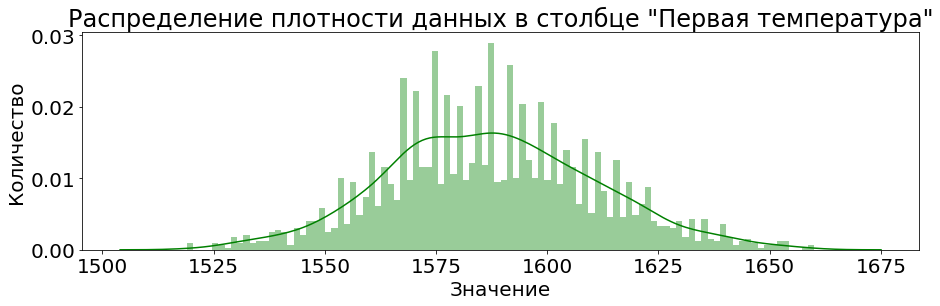

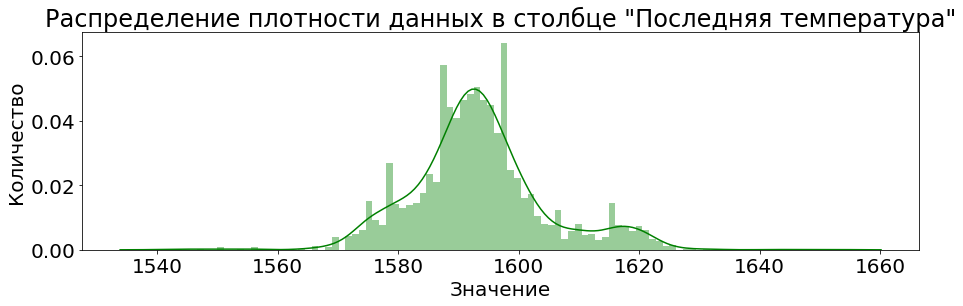

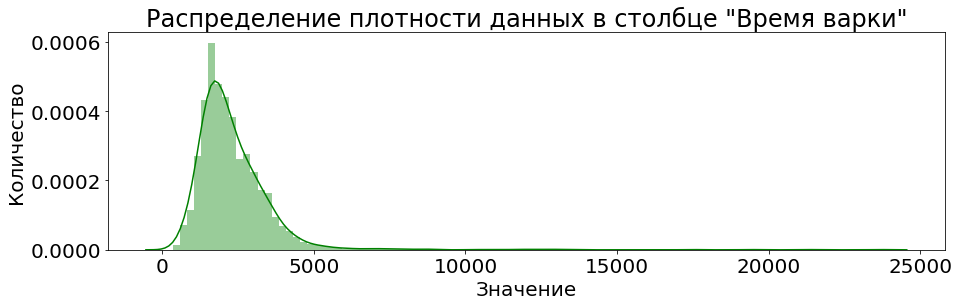

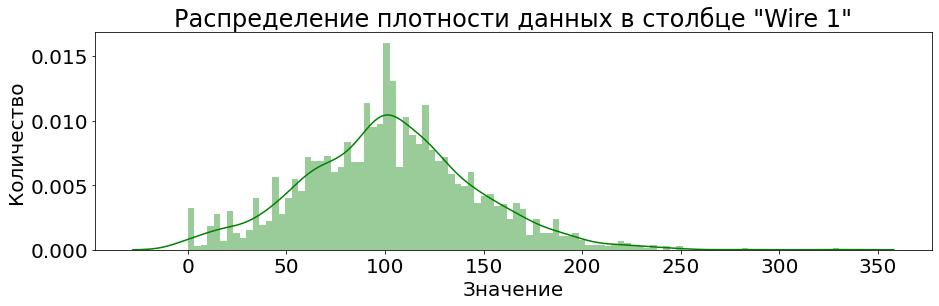

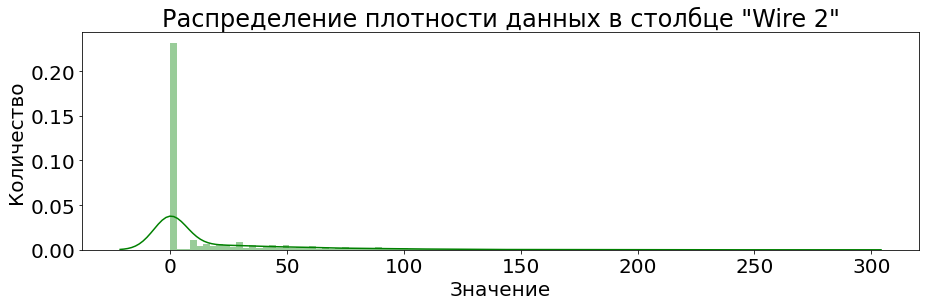

In [72]:
# Посмотрим на плотность распределения мощности датафрейма
draw_hist1(df)

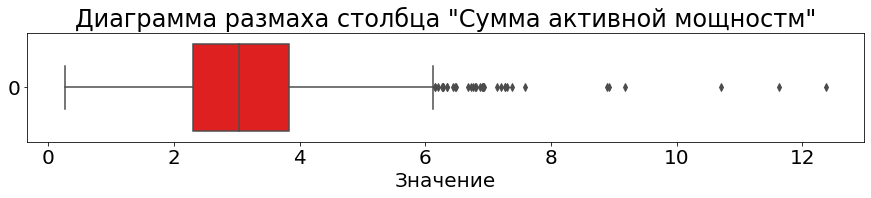

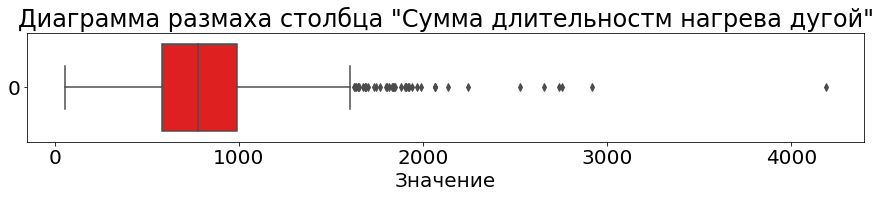

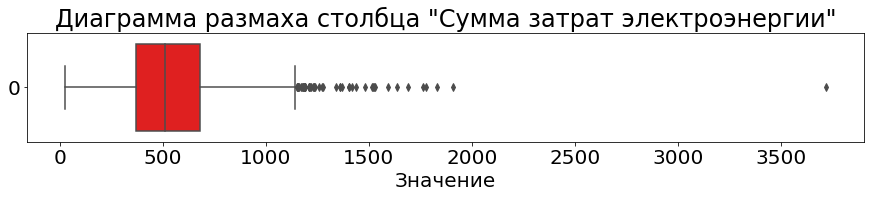

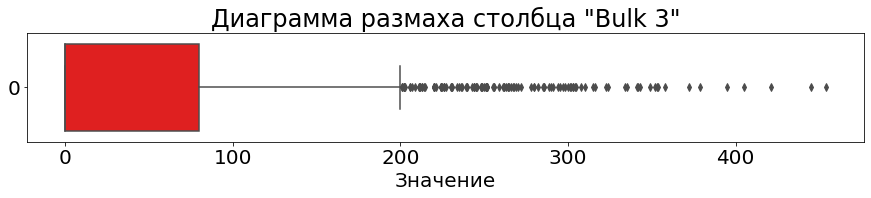

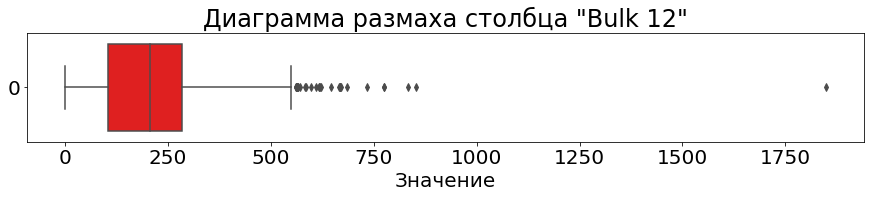

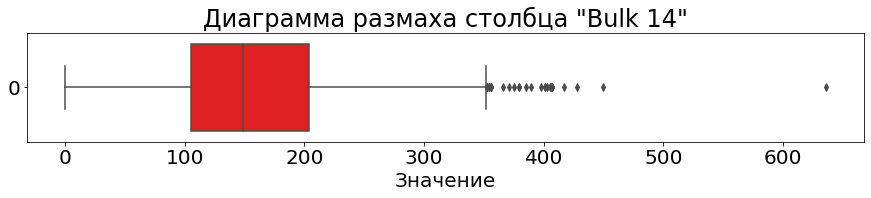

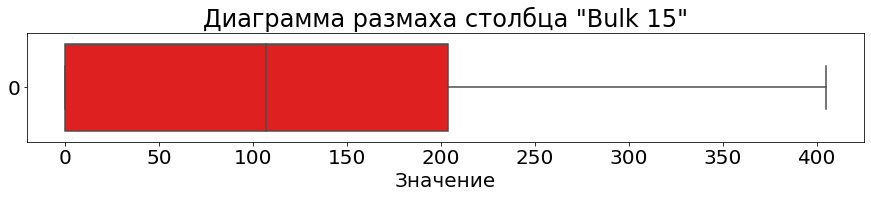

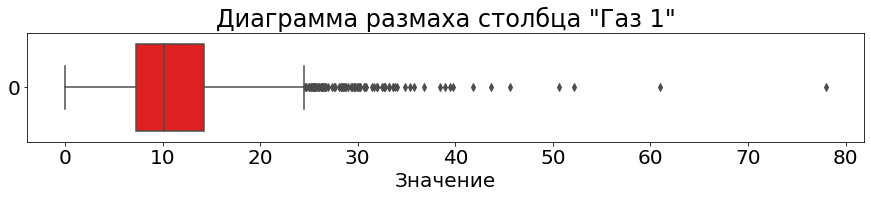

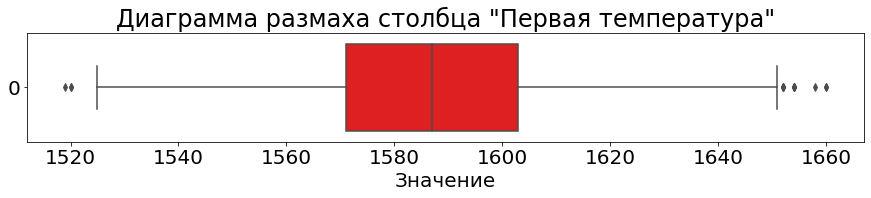

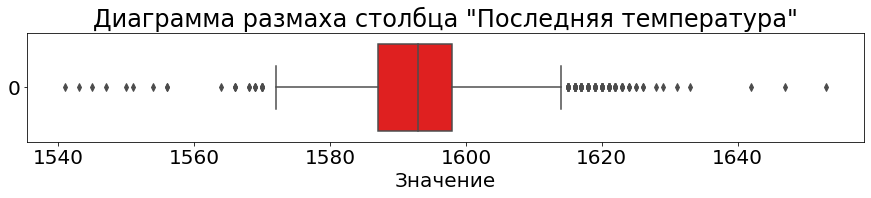

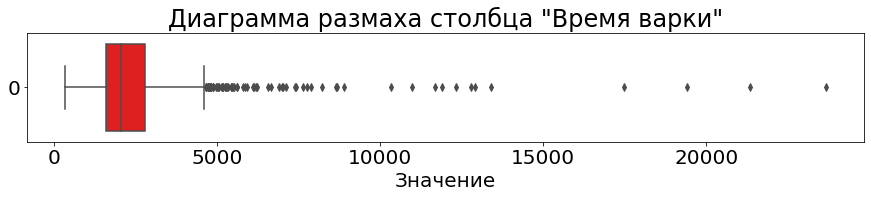

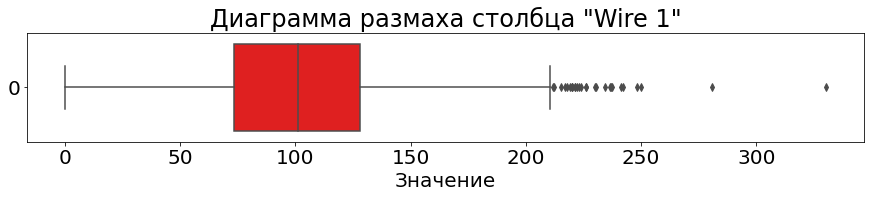

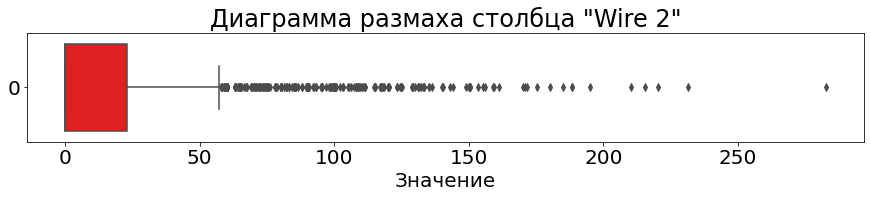

In [73]:
# Посмотрим отображение ящика с усами для датафрейма
draw_box1(df)

**Итог по п.2**

- в итоговом датасете 2325 строк.
- 16 столбцов. 
- есть выбросы.
- нет пропусков.
- наличие мультиколлинеарности отрицательно скажется на качестве Линейной Регрессии, некоторые коэффициенты имеют большие значения (Сумма затрат электроэнергии, Сумма длительности нагрева дугой), что может привести к численной неустойчивости и не позволяет корректно проанализировать важность признаков. Посмотрим как справиться с мультиколлинеарностью регрессия с L1-регуляризацией и какое качество покажет на кросс-валидации.

## Обучение моделей
<a name="3"></a>

In [75]:
# Сформируем обучающую и тестовую выборки
train_features, test_features, train_target, test_target = train_test_split(features, target,
                                                                            test_size=TEST_SIZE, 
                                                                            random_state=RANDOM_STATE)

In [76]:
# Стандартизируем/масштабируем данные
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(train_features)
X_train_ss = pd.DataFrame(X_train_ss, columns=train_features.columns)

In [77]:
# Определим функцию для случайного перебора гиперпараметров
def random_search_params(model, hyperparams, n_iter, X_train=train_features, y_train=train_target):
    model_s = RandomizedSearchCV(estimator=model, 
                                  param_distributions=hyperparams,
                                  n_iter=n_iter,
                                  cv=5, 
                                  scoring='neg_mean_absolute_error',
                                  random_state=RANDOM_STATE)
    model_s.fit(train_features, train_target)

    print(f'Лучшие гиперпараметры модели: {model_s.best_params_}')
    print(f'MAE лучшей модели: {round(abs(model_s.best_score_), 2)}')
    return model_s

### Линейные модели
<a name="3.1"></a>

In [78]:
%%time
# Обучим модель на кросс-валидации
lr = LinearRegression()
mae_lr = abs(cross_val_score(lr, X=X_train_ss, y=train_target, cv=5, scoring='neg_mean_absolute_error')).mean()
mae_lr

CPU times: user 57.6 ms, sys: 54.8 ms, total: 112 ms
Wall time: 68.9 ms


6.106188143844759

In [79]:
# Используем Losso
lasso_hyperparams = {'alpha' : np.linspace(0, 1, 100)}

In [83]:
%%time
searcher_lasso = random_search_params(Lasso(), lasso_hyperparams, n_iter=50, X_train=X_train_ss, y_train=train_target)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44388.52971045757, tolerance: 17.862245408895255
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit

Лучшие гиперпараметры модели: {'alpha': 0.20202020202020204}
MAE лучшей модели: 6.1
CPU times: user 7.46 s, sys: 8.59 s, total: 16.1 s
Wall time: 16.1 s


In [84]:
searcher_lasso.best_score_*-1

6.101489102289575

In [85]:
# Используем Ridge
ridge_hyperparams = {'alpha' : np.linspace(0, 100, 1000)}

In [86]:
searcher_ridge = random_search_params(Ridge(), ridge_hyperparams, n_iter=50, X_train=X_train_ss, y_train=train_target)

Лучшие гиперпараметры модели: {'alpha': 99.2992992992993}
MAE лучшей модели: 6.1


In [87]:
searcher_ridge.best_score_*-1

6.102657414696583

### Случайный Лес
<a name="3.2"></a>

In [88]:
# Обучим модель на кросс-валидации без настройки гиперпараметров
rf = RandomForestRegressor(random_state=RANDOM_STATE, criterion='mae', n_jobs=-1)
mae_rf = abs(cross_val_score(rf, X=train_features, y=train_target, cv=5, scoring='neg_mean_absolute_error')).mean()

In [89]:
# Настроим гиперпараметры
rf_hyperparams = {'max_features' : np.arange(0.4, 1.01, 0.25),
                  'bootstrap' : [False, True]}

In [90]:
%%time
searcher_rf = random_search_params(RandomForestRegressor(random_state=RANDOM_STATE, criterion='mae'), 
                                            rf_hyperparams, n_iter=15, X_train=train_features, y_train=train_target)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=15. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие гиперпараметры модели: {'max_features': 0.9, 'bootstrap': True}
MAE лучшей модели: 6.31
CPU times: user 3min 47s, sys: 380 ms, total: 3min 47s
Wall time: 3min 48s


In [91]:
searcher_rf.best_score_*-1

6.313476575107862

### Градиентный Бустинг
<a name="3.3"></a>

In [92]:
# Настроим гиперпараметры
lgb_hyperparams = {'max_depth'        : range(1, 10, 1),
                   'subsample'        : np.arange(0.5, 1, 0.1),
                   'feature_fraction' : np.arange(0.5, 1, 0.1),
                   'reg_alpha'        : np.arange(0, 1, 0.05),
                   'reg_lambda'       : np.arange(0, 30, 5)}

In [93]:
%%time
searcher_lgb = random_search_params(LGBMRegressor(random_state=RANDOM_STATE, metric='mae'), lgb_hyperparams, n_iter=50, 
                                                                            X_train=train_features, y_train=train_target)

[LightGBM] [Warning] feature_fraction is set=0.7999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7999999999999999
[LightGBM] [Warning] feature_fraction is set=0.7999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7999999999999999
[LightGBM] [Warning] feature_fraction is set=0.7999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7999999999999999
[LightGBM] [Warning] feature_fraction is set=0.7999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7999999999999999
[LightGBM] [Warning] feature_fraction is set=0.7999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7999999999999999
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

In [94]:
searcher_lgb.best_score_*-1

6.034162505036681

### CatBoost
<a name="3.4"></a>

In [95]:
model_cb = CatBoostRegressor(random_state=RANDOM_STATE)

In [96]:
param_cb = {
    'iterations': [100, 110],
    'learning_rate': [0.08, 0.1],
    'depth': [5, 10]
}

In [97]:
%%time
searcher_cb = random_search_params(CatBoostRegressor(random_state=RANDOM_STATE), param_cb, n_iter=50, 
                                                                            X_train=train_features, y_train=train_target)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 11.0933732	total: 49.1ms	remaining: 4.86s
1:	learn: 10.8581720	total: 50.9ms	remaining: 2.49s
2:	learn: 10.6732100	total: 52.4ms	remaining: 1.7s
3:	learn: 10.4783216	total: 54.1ms	remaining: 1.3s
4:	learn: 10.3140901	total: 55.6ms	remaining: 1.06s
5:	learn: 10.1891006	total: 57.4ms	remaining: 899ms
6:	learn: 10.0692482	total: 58.9ms	remaining: 783ms
7:	learn: 9.9498425	total: 60.5ms	remaining: 696ms
8:	learn: 9.8213181	total: 62.1ms	remaining: 628ms
9:	learn: 9.7003749	total: 63.8ms	remaining: 574ms
10:	learn: 9.5770242	total: 65.3ms	remaining: 529ms
11:	learn: 9.4871535	total: 67ms	remaining: 491ms
12:	learn: 9.3891804	total: 68.4ms	remaining: 458ms
13:	learn: 9.3188752	total: 70ms	remaining: 430ms
14:	learn: 9.2306859	total: 71.6ms	remaining: 406ms
15:	learn: 9.1634463	total: 73.1ms	remaining: 384ms
16:	learn: 9.1021032	total: 74.6ms	remaining: 364ms
17:	learn: 9.0440305	total: 76.3ms	remaining: 347ms
18:	learn: 8.9813864	total: 77.8ms	remaining: 332ms
19:	learn: 8.9217882	

In [98]:
%%time
searcher_cb.fit(train_features, train_target)
searcher_cb.best_score_*-1

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 11.0933732	total: 2ms	remaining: 198ms
1:	learn: 10.8581720	total: 3.76ms	remaining: 184ms
2:	learn: 10.6732100	total: 5.91ms	remaining: 191ms
3:	learn: 10.4783216	total: 7.66ms	remaining: 184ms
4:	learn: 10.3140901	total: 9.42ms	remaining: 179ms
5:	learn: 10.1891006	total: 11.3ms	remaining: 177ms
6:	learn: 10.0692482	total: 13.1ms	remaining: 173ms
7:	learn: 9.9498425	total: 15.2ms	remaining: 174ms
8:	learn: 9.8213181	total: 16.9ms	remaining: 171ms
9:	learn: 9.7003749	total: 18.6ms	remaining: 167ms
10:	learn: 9.5770242	total: 20.4ms	remaining: 165ms
11:	learn: 9.4871535	total: 22.1ms	remaining: 162ms
12:	learn: 9.3891804	total: 23.9ms	remaining: 160ms
13:	learn: 9.3188752	total: 25.6ms	remaining: 157ms
14:	learn: 9.2306859	total: 27.3ms	remaining: 155ms
15:	learn: 9.1634463	total: 29ms	remaining: 152ms
16:	learn: 9.1021032	total: 30.7ms	remaining: 150ms
17:	learn: 9.0440305	total: 32.4ms	remaining: 148ms
18:	learn: 8.9813864	total: 34.1ms	remaining: 145ms
19:	learn: 8.9217882

6.041351781305242

### Дерево решений
<a name="3.5"></a>

In [99]:
model_dt = DecisionTreeRegressor(random_state=RANDOM_STATE)

In [100]:
param_dt = { 'max_depth': [1, 10],
             'min_samples_leaf': [1, 10]}

In [101]:
searcher_dt = GridSearchCV(model_dt, param_dt, cv=4, scoring='neg_mean_absolute_error')
searcher_dt.fit(train_features, train_target)
searcher_dt.best_score_*-1

7.497097909817397

**Сравним метрики MAE для моделей**

In [102]:
mae_df = pd.DataFrame(
    index=[
        "Linear Regression cross val",
        "Lasso",
        "Ridge",
        "Random Forest cross val",
        "Random Forest",
        "Gradient Boosting",
        "CatBoost",
        "Decision Tree",
    ],
    data={
        "MAE_val": [
            mae_lr,
            searcher_lasso.best_score_ * -1,
            searcher_ridge.best_score_ * -1,
            mae_rf,
            searcher_rf.best_score_ * -1,
            searcher_lgb.best_score_ * -1,
            searcher_cb.best_score_ * -1,
            searcher_dt.best_score_ * -1,
        ]
    },
)

mae_df.sort_values(by=['MAE_val'])

,MAE_val
Gradient Boosting,6.034163
CatBoost,6.041352
Lasso,6.101489
Ridge,6.102657
Linear Regression cross val,6.106188
Random Forest cross val,6.271257
Random Forest,6.313477
Decision Tree,7.497098


Посмотрим на feature_importances

In [103]:
fi = pd.DataFrame()
fi['features'] = features.columns
fi['importance'] = searcher_lgb.best_estimator_.feature_importances_
fi = fi.sort_values('importance', ascending=False)
fi

,features,importance
8,Первая температура,281
1,Сумма длительностм нагрева дугой,246
9,Время варки,196
10,Wire 1,157
7,Газ 1,119
5,Bulk 14,106
0,Сумма активной мощностм,88
4,Bulk 12,87
2,Сумма затрат электроэнергии,86
6,Bulk 15,68


- Наибольший вес линейной модели с L1-регуляризацией имеет начальная температура. 
- Все параметры характеризующие параметры нагрева электродами, кроме общей мощности оказались значимыми. 
- Расчетные признаки, характеризующие длительность процессов обработки также оказались значимыми. 
- Обнулились коэффициенты при некоторых сыпучих и проволочных материалах, а также расчетные признаки, характеризующие их суммы.

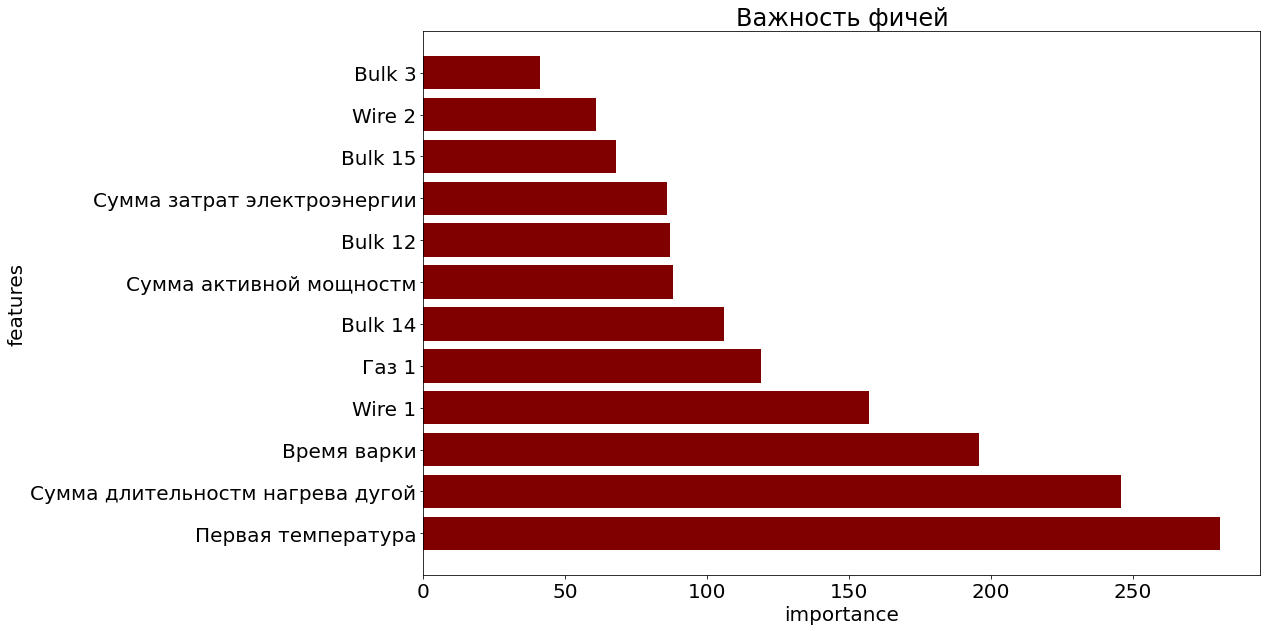

In [104]:
plt.figure(figsize=(15,10))
plt.barh(fi['features'], fi['importance'], color='maroon')
plt.title('Важность фичей')
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

Наиболее важными фичами для модели оказались:

    1) Первая температура (точка отсчета температуры важна, ведь некорректные данные могли ввести нас в заблуждение - их мы отфильтровали)
    
    2) Сумма длительности нагрева дугой (длительность нагрева влияет на энергозатраты компании, поэтому это также несомненно важный показатель)
    
    3) Время варки (аналогично предыдущему пункту)
    
Важность объектов на основе примесей может вводить в заблуждение при использовании объектов с большим количеством элементов. Поэтому их не учитываем и считаем что также важными тут являются фичи:

    1) Сумма затрат электроэнергии (напрямую влияет на затраты компании, а значит и на её доходы)
    
    2) Сумма активной мощности (влияет на потребляемую мощность, а также на частоту профилактических работ, ведь чем выше мощность, тем быстрее "выгорают" материалы в ковше и их надо менять на новые, а это остановка технологического процесса и миллионы рублей потерь прибыли)

Лучшее качество по метрике MAE получена для модели Градиентного бустинга, рассчитаем качество данной модели на тесте.

## Тестирование моделей
<a name="4"></a>

In [105]:
print('MAE:', mae(searcher_lgb.predict(test_features), test_target))

MAE: 6.202099096951337


In [106]:
print('Лучшие параметры:', searcher_lgb.best_params_)

Лучшие параметры: {'subsample': 0.5, 'reg_lambda': 5, 'reg_alpha': 0.30000000000000004, 'max_depth': 5, 'feature_fraction': 0.7999999999999999}


Качество по метрике MAE модели Градиентного Бустинга на тестовой выборке составила 6.202099096951337. Таким образом получена модель, соответствующая требованиям заказчика к качеству модели. Данная модель может быть рекомендована для использования при прогнозе конечной температуры стали.

Для улучшения результатов можно применить тонкую настройку в LightGBM

Существуют различные способы точной настройки модели в LightGBM, в зависимости от типа и сложности модели, размера и качества данных, а также цели и показателей задачи. Вот некоторые распространенные методы.:

1. Переносное обучение: Предварительно подготовленную модель можно применить к новой задаче или области, используя технику, называемую переносным обучением. Цель состоит в том, чтобы применить информацию и функции, полученные из более крупного и всеобъемлющего набора данных, такого как ImageNet или Википедия, к меньшему и более сфокусированному набору данных, такому как CIFAR-10 или IMDB. Переносное обучение может повысить производительность и обобщаемость модели, а также сэкономить время и ресурсы. В зависимости от того, насколько тесно связаны исходный и целевой домены, обучение передаче может включать замораживание или тонкую настройку любого или всех уровней обученной модели. Используя параметр init_model в LightGBM, пользователи могут загружать существующую модель в качестве начальной для дополнительного обучения, чтобы выполнить переносное обучение.

2. Гиперпараметрическая оптимизация: Метод определения наилучших значений гиперпараметров модели, таких как скорость обучения, количество деревьев, количество листьев и т.д., известен как гиперпараметрическая оптимизация. Гиперпараметры - это настройки, сделанные пользователем перед обучением, которые модель не усваивает. Гиперпараметры могут существенно влиять на эффективность и быстродействие модели, однако их часто сложно настроить вручную. Для гиперпараметрической оптимизации можно использовать многочисленные методы поиска, включая поиск по сетке, случайный поиск, байесовскую оптимизацию и т.д. Функция lightgbm.cv в LightGBM может использоваться для выполнения перекрестной проверки с предоставленными параметрами и обеспечения наилучшего результата и идеальных настроек для настройки гиперпараметров.

3. Регуляризация: Регуляризация - это метод применения ограничений или штрафов к модели, чтобы избежать переобучения или уменьшить сложность. Когда модель извлекает слишком много знаний из обучающих данных и не может обобщить их на новые или непроверенные данные, происходит переобучение. Регуляризация может улучшить стабильность модели и робастность за счет снижения дисперсии и шума. Для упорядочивания могут использоваться различные методы, такие как отсев, снижение веса, ранняя остановка и т.д. Регуляризация в LightGBM может быть достигнута путем настройки определенных параметров сложности модели и усадки, таких как lambda_l1, lambda_l2, min_split_gain, min_child_weight и т.д.

## Общий вывод
<a name="5"></a>

В результате выполнения проекта решена задача и достигнута цель - построена модель, которая предсказывает данные с MAE < 6.8. МАЕ на Градиентном Бустинге показало значение 6.202099096951337.

На этапе предобработки и исследовательского анализа данных были проанализированы данные, поступающие из семи таблиц и описывающие различные технологические процессы при подготовке стали.
В рамках проекта также было выполнено/выявлено:

    1) При просмотре и анализе датафрейма с данными об электродах - data_arc_new:
    
        - были загружены данные. 
        - выведена общая информация по датасету об электродах.
        - всего даных 14876.
        - пропуски и дубликаты отсутствуют.
        - в данных содержится информация с 03 мая по 06 сентября 2019 года.
        - произведена замена данных мощностей.
        - произведена замена типа полей с датами.
        - избавились от выброса Реактивной мощности.
        - гистограммы распределений похожи, по форме напоминают распределение Пуассона.
        - диаграмма размаха показывает некоторое количество выбросов (за максимальным НЕ выбросом).
     2) При просмотре и анализе датафрейма с данными о подаче сыпучих материалов (объём) - data_bulk_new:
        - были загружены данные. 
        - выведена общая информация по датасету о подаче сыпучих материалов (объём).
        - всего даных 3129.
        - дубликаты отсутствуют. 
        - пропусков много во всех столбцах.
        - присутствуют выбросы.
        - произведена замена данных с пропусками на 0.
        - избавились от столбцов с единичными данными или данными с большим количеством NaN, так как они не репрезентативны.
     3) При просмотре и анализе датафрейма с данными о подаче сыпучих материалов (время) - data_bulk_time_new:
        - были загружены данные. 
        - выведена общая информация по датасету о подаче сыпучих материалов (время).
        - всего даных 3129.
        - дубликаты отсутствуют. 
        - пропусков много во всех столбцах.
        - произведена замена типа полей с датами.
        - произведена замена данных с пропусками на 0.
        - произведен рассчет столбцов с временем начала добавления сыпучих материалов, окончания и длительности процесса.
        - оставлены только рассчитанные столбцы.
     4) При просмотре и анализе датафрейма с данными о продувке сплава газом - data_gas_new:
        - были загружены данные.
        - выведена общая информация по датасету о продувке сплава газом.
        - всего даных 3239.
        - дубликаты отсутствуют.
        - пропуски отсутствуют.
        - присутствуют выбросы.
        - Объем подаваемого газа составляет в среднем 10 м3, в некоторых случаях достигая 40-80 м3. Т.к. на данном этапе нет информации о допустимых границах этого параметра технологическом процессе, оставим все имеющиеся значения без изменения.
     5) При просмотре и анализе датафрейма с данными об измерении температуры - data_temp_new:
        - были загружены данные.
        - выведена общая информация по датасету об измерении температуры.
        - всего даных 18092.
        - дубликаты отсутствуют.
        - пропуски присутствуют в столбце Температура.
        - присутствуют выбросы.
        - удалили данные с температурой плавления < 1300
        - произведена замена типа полей с датами.
        - удалили данные, когда температура не возрастала.
        - удалили данные с одним замером температуры.
        - агрегировали данные температуры.
        - агрегировали данные времени замера.
        - избавились от лишних данных.
        - использовали функцию merge для объединения вышеуказанных данных.
     6) При просмотре и анализе датафрейма с данными о проволочных материалах (объём) - data_wire_new:
        - были загружены данные.
        - выведена общая информация по датасету о проволочных материалах (объём).
        - всего даных 3081.
        - дубликаты отсутствуют.
        - пропуски присутствуют в разных столбцах.
        - присутствуют выбросы.
        - произведена замена данных с пропусками на 0.
        - избавились от столбцов с большим количеством NaN, так как они не репрезентативны.
     7) При просмотре и анализе датафрейма с данными о проволочных материалах (время)
        - были загружены данные.
        - выведена общая информация по датасету о проволочных материалах (объём).
        - всего даных 3081.
        - дубликаты отсутствуют.
        - пропуски присутствуют в разных столбцах.
        - произведена замена типа полей с датами.
        - рассчитаны столбцы с временем начала добавления проволочных материалов, окончания и длительности процесса.
        - избавились от столбцов с большим количеством NaN, так как они не репрезентативны.
     8) Объединили и проанализировали данные:
        - в итоговом датасете 2325 строк.
        - 58 столбцов. 
        - есть выбросы.
        - нет пропусков.
        - построена Тепловая карта.
     9) Обучили несколько моделей:
        - Линейные регрессии (кросс-валидация, Lasso, Ridge)
        - Случайный Лес (кросс-валидация, с подбором параметров)
        - Градиентный Бустинг
        - CatBoost
        - Дерево решений
    10) Модели сравнили и выбрана лучшая по показателю MAE. Лучшего качества по заданной метрике удалось достичь с использованием модели Градиентного Бустинга.
    11) Произведено тестирование на лучшей модели. Полученное качество удовлетворяет требованиям заказчика.
    12) Посмотрели и проанализировали feature_importances.
        
В итоге модель Градиентного Бустинга (LightGBM) показала хорошее качество при прогнозирования и может быть рекомендована для дальнейшего использования и внедрения при прогнозе конечной температуры стали. Модель может быть ещё улучшена, в пункте 4 описано как это сделать.

А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает сам собой: а это точно так? Мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.
    
Так же есть ещё одна идея:

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве.
Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры.
Но мы же знаем жизнь. легкие колебания температур есть всегда. Более того - будут вегда! И нам что, стараться угадывать их? Не угонимся... Итак, разброс в измерениях - есть, был и будет (т.к. этому благоприятствует разнообразие факторов самого проиозводства). Тогда задачу можно поставить так: надо уменьшить разброс в измерениях. В данном случае в температуре.
    
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное. А что, если фикировать случаи, когда температура выходит за эти границы? Скажем, как "1". И тогда для таких моментов времени собирать информацию по производству:
    
    - а что был за материал (химия материала), 
    - что был за газ (химический состав газа), 
    - какая бригада работала,
    - что там было с электродами и тд
    
И вот тут уже можем находить причины (через корреляции, проверки гипотез, разные модели...), фиксировать эти причины. 
Ну и разрабатывать энергосберегательные мероприятия.